## Analysis v4

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from natsort import index_natsorted

### Calculating the Variance of the AF and FPS values 

It would be quite interesting to see if for each variant site per motif, the variance of the AF and FPS values are correlated.

I.e. if a variant site has a high variance in AF values, does it also have a high variance in FPS values?

First, load the data file as dataframe and then truncate the columns to include on AF and FPS data. Next, convert the dataframe into long format.

In [2]:
# import the data
# filename = '/home/msazizan/hyperspace/gatk-workflow/plotting/output-data/combined_matrix/E2F5_E2F5_HUMAN.H11MO.0.B_fpscore-af-varsites-combined-matrix-wide.tsv'
filename = '/scratch/users/ntu/suffiazi/outputs/tmp/plotting/input_data/E2F5_E2F5_HUMAN.H11MO.0.B_fpscore-af-varsites-combined-matrix-wide.tsv'
matrix_afps = pd.read_csv(filename, sep='\t')
# extract motif id from filename
motif_id = os.path.basename(filename).replace('_fpscore-af-varsites-combined-matrix-wide.tsv', '')
motif_id

'E2F5_E2F5_HUMAN.H11MO.0.B'

In [3]:
matrix_afps

Chromosome      Start        End  98JKPD8_lumA_fps  ANAB5F7_basal_fps  \
0          chr1     905473     905483           0.10260            0.12218   
1          chr1     925405     925415           0.09540            0.03670   
2          chr1    1020750    1020760           0.09749            0.09080   
3          chr1    1130413    1130423           0.11471            0.04786   
4          chr1    1225277    1225287           0.01792            0.04624   
...         ...        ...        ...               ...                ...   
2180       chrX  118300271  118300281           0.00703            0.00985   
2181       chrX  119211181  119211191           0.01215            0.01187   
2182       chrX  139342109  139342119           0.02016            0.00831   
2183       chrX  147508113  147508123           0.00810            0.00633   
2184       chrX  150849074  150849084           0.34392            0.07363   

      S6R691V_her2_fps  PU24GB8_lumB_fps  2GAMBDQ_norm_fps  \
0              0.13921           0.12024           0.14062   
1              0.09011           0.05082           0.05586   
2              0.07864           0.10880           0.08458   
3              0.11338           0.14384           0.15151   
4              0.02729           0.01957           0.02657   
...                ...               ...               ...   
2180           0.00556           0.00611           0.00910   
2181           0.01025           0.01366           0.01454   
2182           0.02155           0.01655           0.02160   
2183           0.00697           0.00629           0.01465   
2184           0.35995           0.24735           0.20522   

      2GAMBDQ_norm_varsite_pos 2GAMBDQ_norm_ref_allele  ... ANAB5F7_basal_AF  \
0                          NaN                     NaN  ...         0.000000   
1                     925409.0                       T  ...         0.730769   
2                    1020755.0                       C  ...         0.000000   
3                    1130420.0                       C  ...         0.062500   
4                    1225285.0                       G  ...         0.062500   
...                        ...                     ...  ...              ...   
2180                       NaN                     NaN  ...         0.000000   
2181                       NaN                     NaN  ...         0.093750   
2182                       NaN                     NaN  ...         0.000000   
2183                       NaN                     NaN  ...         0.045455   
2184               150849077.0                       C  ...         0.600000   

      PU24GB8_lumB_varsite_pos  PU24GB8_lumB_ref_allele  \
0                     905474.0                        G   
1                     925409.0                        T   
2                          NaN                      NaN   
3                    1130420.0                        C   
4                    1225285.0                        G   
...                        ...                      ...   
2180               118300279.0                        G   
2181                       NaN                      NaN   
2182                       NaN                      NaN   
2183                       NaN                      NaN   
2184               150849077.0                        C   

     PU24GB8_lumB_alt_allele PU24GB8_lumB_AF  S6R691V_her2_varsite_pos  \
0                          A        0.027778                       NaN   
1                          C        0.769231                  925409.0   
2                        NaN        0.000000                       NaN   
3                          T        0.131579                 1130420.0   
4                          A        0.078947                 1225285.0   
...                      ...             ...                       ...   
2180                       A        0.071429                       NaN   
2181                     NaN        0.000000               11

Let's filter the loaded table to include only the `_AF` and `_fps` columns, as well as the `region_id` column.

In [4]:
afps_df = matrix_afps.filter(regex='_AF$|_fps$|_id$').copy()
afps_df

98JKPD8_lumA_fps  ANAB5F7_basal_fps  S6R691V_her2_fps  PU24GB8_lumB_fps  \
0              0.10260            0.12218           0.13921           0.12024   
1              0.09540            0.03670           0.09011           0.05082   
2              0.09749            0.09080           0.07864           0.10880   
3              0.11471            0.04786           0.11338           0.14384   
4              0.01792            0.04624           0.02729           0.01957   
...                ...                ...               ...               ...   
2180           0.00703            0.00985           0.00556           0.00611   
2181           0.01215            0.01187           0.01025           0.01366   
2182           0.02016            0.00831           0.02155           0.01655   
2183           0.00810            0.00633           0.00697           0.00629   
2184           0.34392            0.07363           0.35995           0.24735   

      2GAMBDQ_norm_fps  2GAMBDQ_norm_AF  98JKPD8_lumA_AF  ANAB5F7_basal_AF  \
0              0.14062         0.000000         0.000000          0.000000   
1              0.05586         1.000000         1.000000          0.730769   
2              0.08458         0.062500         0.000000          0.000000   
3              0.15151         0.250000         0.181818          0.062500   
4              0.02657         0.071429         0.090909          0.062500   
...                ...              ...              ...               ...   
2180           0.00910         0.000000         0.000000          0.000000   
2181           0.01454         0.000000         0.050000          0.093750   
2182           0.02160         0.000000         0.000000          0.000000   
2183           0.01465         0.000000         0.000000          0.045455   
2184           0.20522         0.750000         0.500000          0.600000   

      PU24GB8_lumB_AF  S6R691V_her2_AF                 region_id  
0            0.027778         0.000000        chr1:905473-905483  
1            0.769231         0.730769        chr1:925405-925415  
2            0.000000         0.000000      chr1:1020750-1020760  
3            0.131579         0.147059      chr1:1130413-1130423  
4            0.078947         0.088235      chr1:1225277-1225287  
...               ...              ...                       ...  
2180         0.071429         0.000000  chrX:118300271-118300281  
2181         0.000000         0.062500  chrX:119211181-119211191  
2182         0.000000         0.066667  chrX:139342109-139342119  
2183         0.000000         0.000000  chrX:147508113-147508123  
2184         0.605263         0.588235  chrX:150849074-150849084  

[2185 rows x 11 columns]

In [5]:
# convert to long format
afps_df_long = afps_df.melt(id_vars=["region_id"], var_name="variable", value_name="value")

# split the variable column into sample_id and type columns using reverse split string method, which returns a dataframe of columns based on the number of splits (n=x); this can directly be assigned to new columns in the original dataframe
afps_df_long[['sample_id', 'type']] = afps_df_long['variable'].str.rsplit('_', n=1, expand=True)

# drop the redundant 'variable' column
afps_df_long = afps_df_long.drop(columns=["variable"])

# now pivot the dataframe to create new columns based on the type column
afps_df_lpv = afps_df_long.pivot(index=['region_id', 'sample_id'], columns='type', values='value').reset_index()

# remove the index name and rename the columns to match the type values
afps_df_lpv = afps_df_lpv.rename_axis(None, axis=1).rename(columns={'fps': 'FPS'})

# sort the dataframe by region_id naturally
afps_df_lpv = afps_df_lpv.reindex(index=index_natsorted(afps_df_lpv['region_id']))
afps_df_lpv = afps_df_lpv.reset_index(drop=True)
afps_df_lpv

region_id      sample_id        AF      FPS
0            chr1:905473-905483   2GAMBDQ_norm  0.000000  0.14062
1            chr1:905473-905483   98JKPD8_lumA  0.000000  0.10260
2            chr1:905473-905483  ANAB5F7_basal  0.000000  0.12218
3            chr1:905473-905483   PU24GB8_lumB  0.027778  0.12024
4            chr1:905473-905483   S6R691V_her2  0.000000  0.13921
...                         ...            ...       ...      ...
10920  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522
10921  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392
10922  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363
10923  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735
10924  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995

[10925 rows x 4 columns]

In [ ]:
afps_df_lpv[afps_df_lpv['sample_id'] == '2GAMBDQ_norm'].describe()

### AF–FPS Matrix
At this point, we now have both a matrix of AF and FPS values in wide form (`afps_df`) and the same dataset in long form (`afps_df_lpv`). We can scale the FPS values to be between 0 and 1 now.

In [6]:
# use MinMaxScaler to scale the raw fps values to range between 0 and 1
from sklearn.preprocessing import MinMaxScaler
# scale the FPS values to a range of 0-1
# Initialize a MinMaxScaler
scaler = MinMaxScaler()

# copy df
fps_df_scaled = matrix_afps.filter(regex='_fps$|_id$').copy()

# set the index to 'region_id'
fps_df_scaled = fps_df_scaled.set_index('region_id')

# Fit the MinMaxScaler to the 'FPS' column and transform it
fps_df_scaled = pd.DataFrame(scaler.fit_transform(fps_df_scaled), columns=fps_df_scaled.columns, index=fps_df_scaled.index)

# rename columns by adding '_scaled' to the column names
fps_df_scaled = fps_df_scaled.add_suffix('_scaled')
fps_df_scaled

98JKPD8_lumA_fps_scaled  ANAB5F7_basal_fps_scaled  \
region_id                                                                     
chr1:905473-905483                       0.045183                  0.062660   
chr1:925405-925415                       0.042012                  0.018821   
chr1:1020750-1020760                     0.042933                  0.046566   
chr1:1130413-1130423                     0.050516                  0.024545   
chr1:1225277-1225287                     0.007892                  0.023714   
...                                           ...                       ...   
chrX:118300271-118300281                 0.003096                  0.005052   
chrX:119211181-119211191                 0.005351                  0.006087   
chrX:139342109-139342119                 0.008878                  0.004262   
chrX:147508113-147508123                 0.003567                  0.003246   
chrX:150849074-150849084                 0.151456                  0.037761   

                          S6R691V_her2_fps_scaled  PU24GB8_lumB_fps_scaled  \
region_id                                                                    
chr1:905473-905483                       0.069304                 0.056307   
chr1:925405-925415                       0.044860                 0.023798   
chr1:1020750-1020760                     0.039150                 0.050950   
chr1:1130413-1130423                     0.056445                 0.067359   
chr1:1225277-1225287                     0.013586                 0.009164   
...                                           ...                      ...   
chrX:118300271-118300281                 0.002768                 0.002861   
chrX:119211181-119211191                 0.005103                 0.006397   
chrX:139342109-139342119                 0.010728                 0.007750   
chrX:147508113-147508123                 0.003470                 0.002946   
chrX:150849074-150849084                 0.179197                 0.115831   

                          2GAMBDQ_norm_fps_scaled  
region_id                                          
chr1:905473-905483                       0.065892  
chr1:925405-925415                       0.026175  
chr1:1020750-1020760                     0.039632  
chr1:1130413-1130423                     0.070994  
chr1:1225277-1225287                     0.012450  
...                                           ...  
chrX:118300271-118300281                 0.004264  
chrX:119211181-119211191                 0.006813  
chrX:139342109-139342119                 0.010121  
chrX:147508113-147508123                 0.006865  
chrX:150849074-150849084                 0.096162  

[2185 rows x 5 columns]

Now we should convert the FPS scaled dataframe into long form.

In [7]:
# reset index
fps_df_scaled_long = fps_df_scaled.reset_index()
# convert to long format
fps_df_scaled_long = fps_df_scaled_long.melt(id_vars=["region_id"], var_name="variable", value_name="value")

# split the variable column into sample_id and type columns using reverse split string method, which returns a dataframe of columns based on the number of splits (n=x); this can directly be assigned to new columns in the original dataframe
# Split the 'variable' column into three parts
fps_df_scaled_long[['part1', 'part2', 'part3']] = fps_df_scaled_long['variable'].str.rsplit('_', n=2, expand=True)

# Assign part1 to 'sample_id' and concatenate the other parts to form 'type'
fps_df_scaled_long['sample_id'] = fps_df_scaled_long['part1']
fps_df_scaled_long['type'] = fps_df_scaled_long['part2'].str.upper() + '_' + fps_df_scaled_long['part3']

# Drop the unnecessary columns
fps_df_scaled_long = fps_df_scaled_long.drop(['variable', 'part1', 'part2', 'part3'], axis=1)

# now pivot the dataframe to create new columns based on the type column
fps_df_scaled_lpv = fps_df_scaled_long.pivot(index=['region_id', 'sample_id'], columns='type', values='value').reset_index()

# remove the index name and rename the columns to match the type values
fps_df_scaled_lpv = fps_df_scaled_lpv.rename_axis(None, axis=1)

# sort the dataframe by region_id naturally
fps_df_scaled_lpv = fps_df_scaled_lpv.reindex(index=index_natsorted(fps_df_scaled_lpv['region_id']))
fps_df_scaled_lpv = fps_df_scaled_lpv.reset_index(drop=True)
fps_df_scaled_lpv

region_id      sample_id  FPS_scaled
0            chr1:905473-905483   2GAMBDQ_norm    0.065892
1            chr1:905473-905483   98JKPD8_lumA    0.045183
2            chr1:905473-905483  ANAB5F7_basal    0.062660
3            chr1:905473-905483   PU24GB8_lumB    0.056307
4            chr1:905473-905483   S6R691V_her2    0.069304
...                         ...            ...         ...
10920  chrX:150849074-150849084   2GAMBDQ_norm    0.096162
10921  chrX:150849074-150849084   98JKPD8_lumA    0.151456
10922  chrX:150849074-150849084  ANAB5F7_basal    0.037761
10923  chrX:150849074-150849084   PU24GB8_lumB    0.115831
10924  chrX:150849074-150849084   S6R691V_her2    0.179197

[10925 rows x 3 columns]

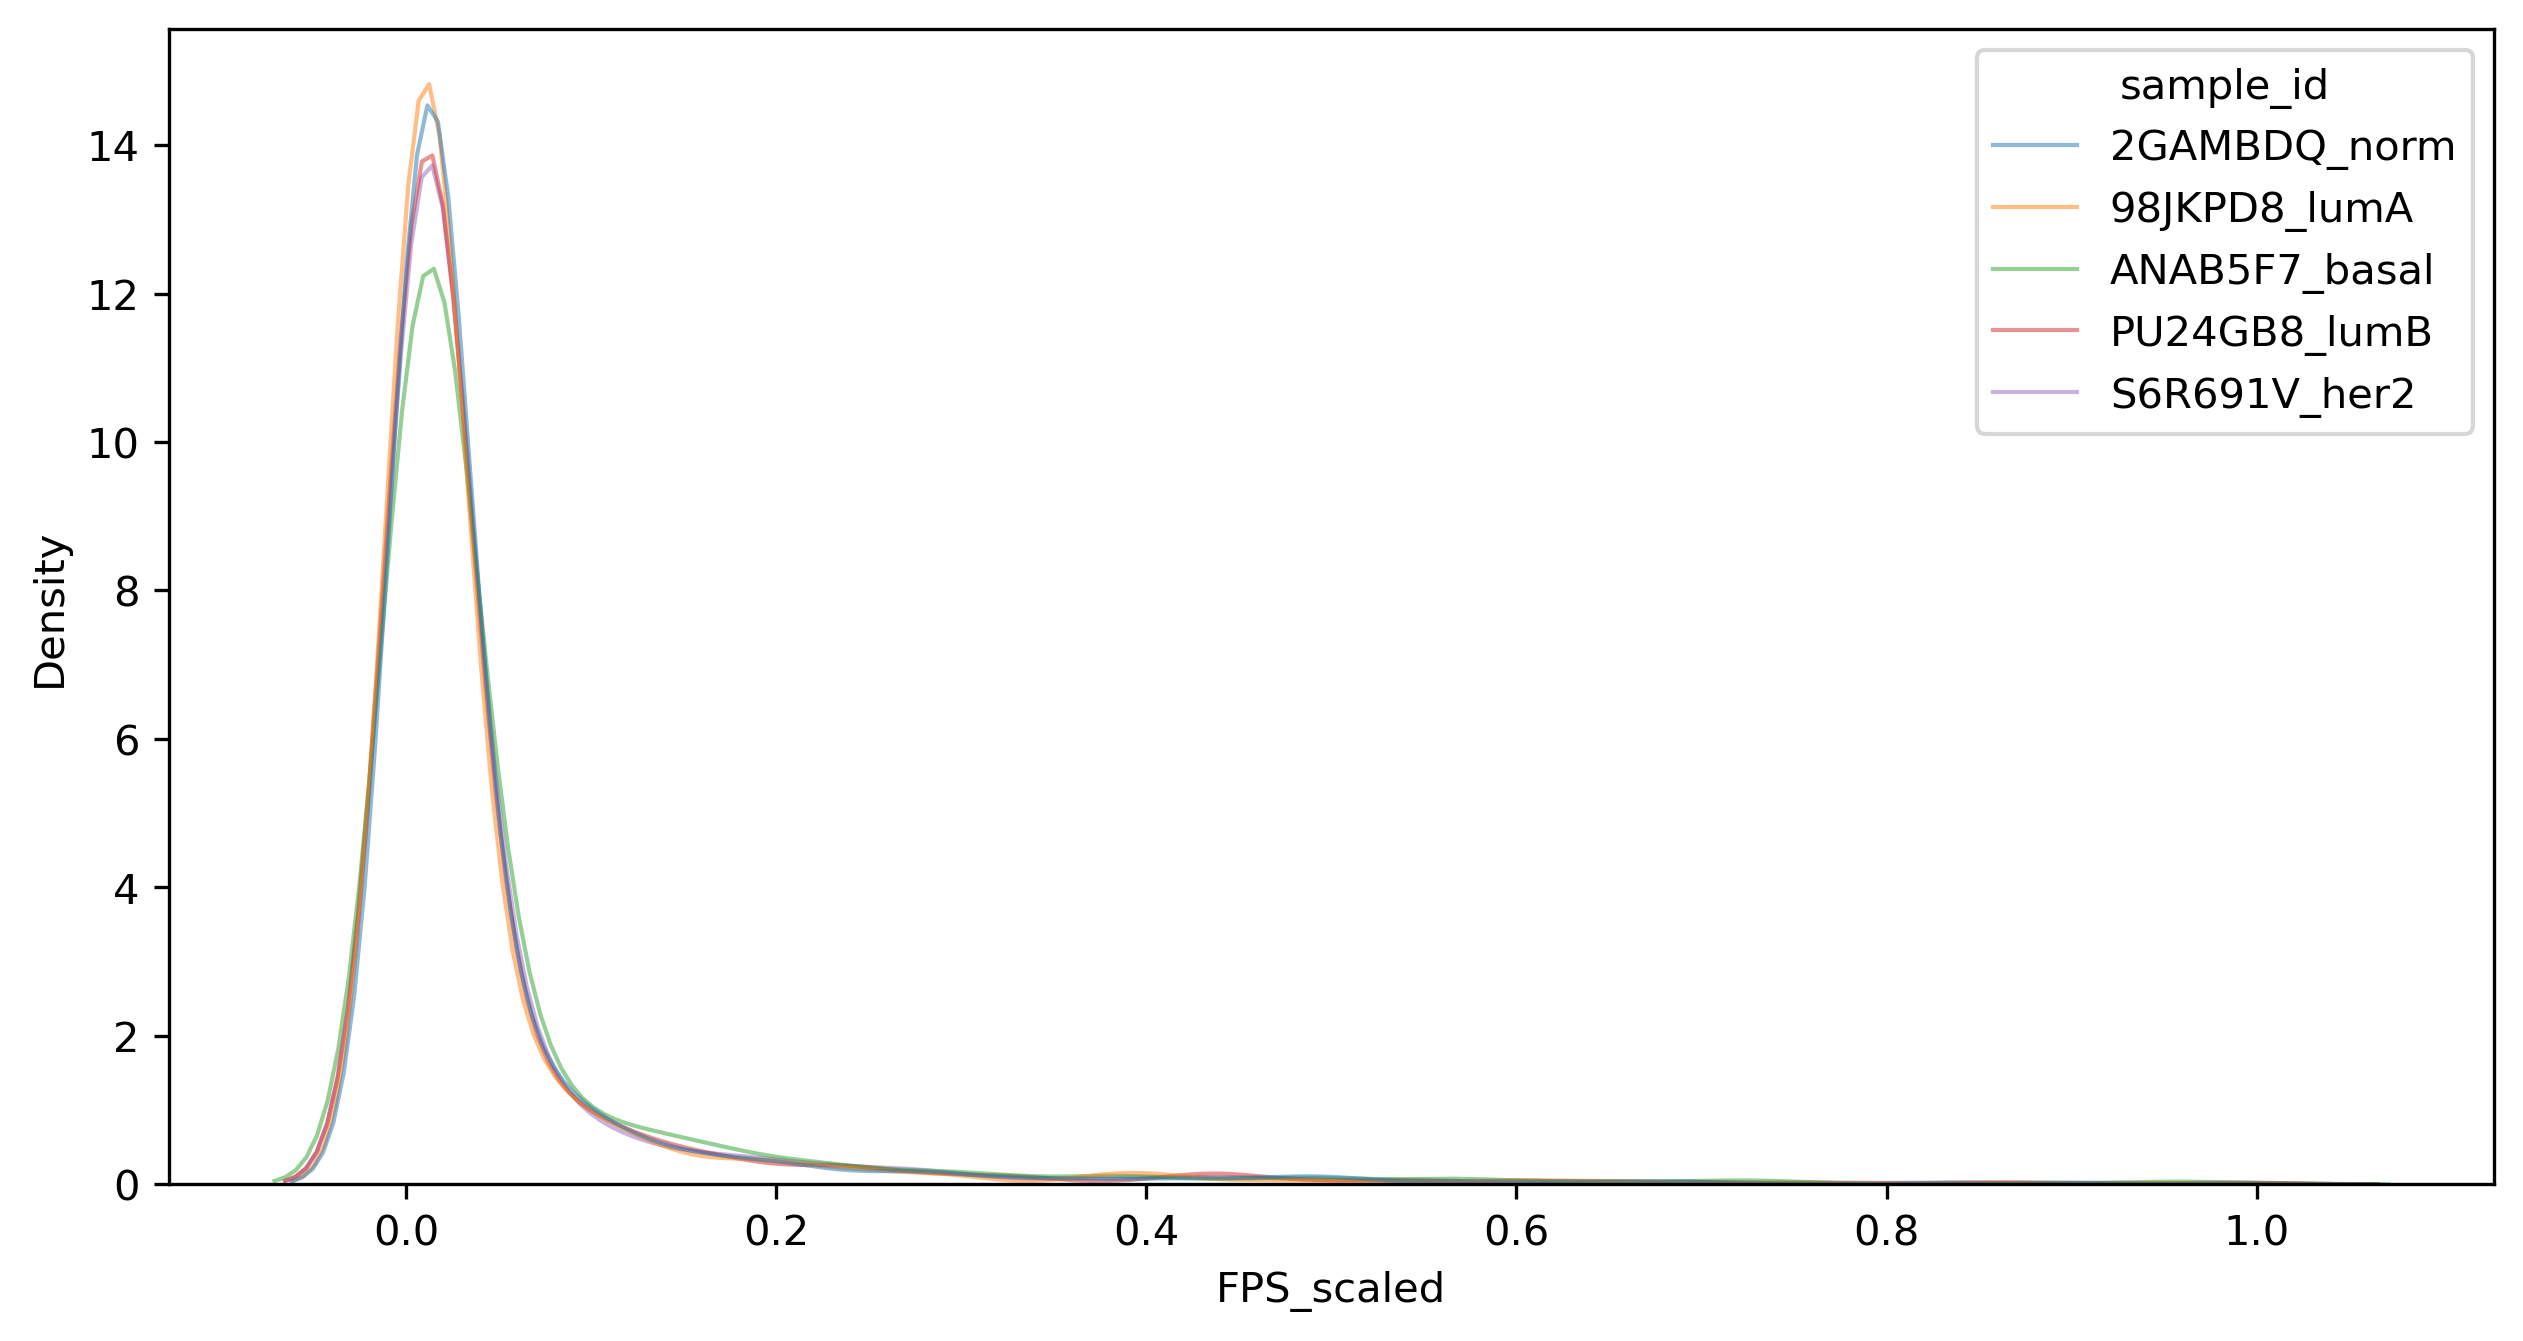

In [8]:
# plot fps distribution
plt.figure(figsize=(10, 5), dpi=300)
sns.kdeplot(data=fps_df_scaled_lpv, x="FPS_scaled", hue="sample_id", fill=False, common_norm=False, alpha=.5, linewidth=1)
plt.show()

### Merging `afps_df_lpv` and `fps_df_scaled_lpv`

Now we can merge the two long dataframes together to get both raw FPS and scaled FPS values in one dataframe.

In [9]:
afps_df_lpv

region_id      sample_id        AF      FPS
0            chr1:905473-905483   2GAMBDQ_norm  0.000000  0.14062
1            chr1:905473-905483   98JKPD8_lumA  0.000000  0.10260
2            chr1:905473-905483  ANAB5F7_basal  0.000000  0.12218
3            chr1:905473-905483   PU24GB8_lumB  0.027778  0.12024
4            chr1:905473-905483   S6R691V_her2  0.000000  0.13921
...                         ...            ...       ...      ...
10920  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522
10921  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392
10922  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363
10923  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735
10924  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995

[10925 rows x 4 columns]

In [10]:
fps_df_scaled_lpv

region_id      sample_id  FPS_scaled
0            chr1:905473-905483   2GAMBDQ_norm    0.065892
1            chr1:905473-905483   98JKPD8_lumA    0.045183
2            chr1:905473-905483  ANAB5F7_basal    0.062660
3            chr1:905473-905483   PU24GB8_lumB    0.056307
4            chr1:905473-905483   S6R691V_her2    0.069304
...                         ...            ...         ...
10920  chrX:150849074-150849084   2GAMBDQ_norm    0.096162
10921  chrX:150849074-150849084   98JKPD8_lumA    0.151456
10922  chrX:150849074-150849084  ANAB5F7_basal    0.037761
10923  chrX:150849074-150849084   PU24GB8_lumB    0.115831
10924  chrX:150849074-150849084   S6R691V_her2    0.179197

[10925 rows x 3 columns]

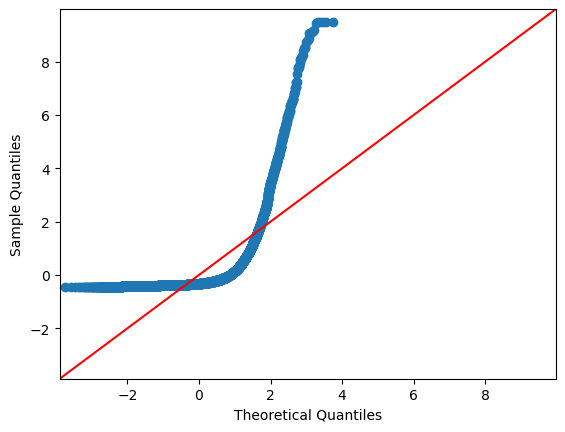

In [11]:
fig = sm.qqplot(fps_df_scaled_lpv['FPS_scaled'], line='45', fit=True)
plt.show()

In [12]:
# merge two dataframes on region_id and sample_id
afps_full_dfl = afps_df_lpv.merge(fps_df_scaled_lpv, on=['region_id', 'sample_id'])
afps_full_dfl

region_id      sample_id        AF      FPS  FPS_scaled
0            chr1:905473-905483   2GAMBDQ_norm  0.000000  0.14062    0.065892
1            chr1:905473-905483   98JKPD8_lumA  0.000000  0.10260    0.045183
2            chr1:905473-905483  ANAB5F7_basal  0.000000  0.12218    0.062660
3            chr1:905473-905483   PU24GB8_lumB  0.027778  0.12024    0.056307
4            chr1:905473-905483   S6R691V_her2  0.000000  0.13921    0.069304
...                         ...            ...       ...      ...         ...
10920  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522    0.096162
10921  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392    0.151456
10922  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363    0.037761
10923  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735    0.115831
10924  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995    0.179197

[10925 rows x 5 columns]

In [50]:
# save to file
# afps_full_dfl.to_csv(f'/home/msazizan/hyperspace/gatk-workflow/plotting/output-data/AF-FPS_regionsorted_full_longtable/{motif_id}_afps_full_scaled_longtable.tsv', sep='\t', index=False)

In [30]:
dutchfield = ["#e60049", "#0bb4ff", "#87bc45", "#ef9b20", "#b33dc6"]

springpastel = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a"] 

### Calculating Variation Statistics
With the full data table cleaned up into a long format, we can now calculate the variation statistics for each region. We will calculate the following statistics:
* variance (Var)
* ~~coefficient of variation (CV)~~
* ~~quartile coefficient of dispersion (QCD)~~

First calculate statistics on the raw FPS data.

In [13]:
# extract fps columns
fps_df = matrix_afps.filter(regex='_fps$|_id$')
# calculate variance of fps values across samples per region_id and add to a new column called 'fps_var'
fps_df = fps_df.set_index('region_id')
fps_df['FPS_var'] = fps_df.var(axis=1)
# calculate the coefficient of variation (CV) of fps values across samples per region_id and add to a new column called 'fps_cv'
# fps_df['FPS_cv'] = fps_df.drop(columns=['FPS_var']).std(axis=1) / fps_df.drop(columns=['FPS_var']).mean(axis=1) * 100
# calculate the quartile coefficient of dispersion (QCD) of fps values across samples per region_id and add to a new column called 'fps_qcd'
# fps_df['FPS_qcd'] = (fps_df.drop(columns=['FPS_var', 'FPS_cv']).quantile(q=0.75, axis=1) - fps_df.drop(columns=['FPS_var', 'FPS_cv']).quantile(q=0.25, axis=1)) / (fps_df.drop(columns=['FPS_var', 'FPS_cv']).quantile(q=0.75, axis=1) + fps_df.drop(columns=['FPS_var', 'FPS_cv']).quantile(q=0.25, axis=1))
fps_df

98JKPD8_lumA_fps  ANAB5F7_basal_fps  \
region_id                                                       
chr1:905473-905483                 0.10260            0.12218   
chr1:925405-925415                 0.09540            0.03670   
chr1:1020750-1020760               0.09749            0.09080   
chr1:1130413-1130423               0.11471            0.04786   
chr1:1225277-1225287               0.01792            0.04624   
...                                    ...                ...   
chrX:118300271-118300281           0.00703            0.00985   
chrX:119211181-119211191           0.01215            0.01187   
chrX:139342109-139342119           0.02016            0.00831   
chrX:147508113-147508123           0.00810            0.00633   
chrX:150849074-150849084           0.34392            0.07363   

                          S6R691V_her2_fps  PU24GB8_lumB_fps  \
region_id                                                      
chr1:905473-905483                 0.13921           0.12024   
chr1:925405-925415                 0.09011           0.05082   
chr1:1020750-1020760               0.07864           0.10880   
chr1:1130413-1130423               0.11338           0.14384   
chr1:1225277-1225287               0.02729           0.01957   
...                                    ...               ...   
chrX:118300271-118300281           0.00556           0.00611   
chrX:119211181-119211191           0.01025           0.01366   
chrX:139342109-139342119           0.02155           0.01655   
chrX:147508113-147508123           0.00697           0.00629   
chrX:150849074-150849084           0.35995           0.24735   

                          2GAMBDQ_norm_fps   FPS_var  
region_id                                             
chr1:905473-905483                 0.14062  0.000245  
chr1:925405-925415                 0.05586  0.000659  
chr1:1020750-1020760               0.08458  0.000137  
chr1:1130413-1130423               0.15151  0.001668  
chr1:1225277-1225287               0.02657  0.000127  
...                                    ...       ...  
chrX:118300271-118300281           0.00910  0.000003  
chrX:119211181-119211191           0.01454  0.000003  
chrX:139342109-139342119           0.02160  0.000031  
chrX:147508113-147508123           0.01465  0.000012  
chrX:150849074-150849084           0.20522  0.013487  

[2185 rows x 6 columns]

Then do the same on the fps scaled data.

In [14]:
# calculate variance of fps_scaled values across samples per region_id and add to a new column called 'fps_scaled_var'
fps_df_scaled['FPS_scaled_var'] = fps_df_scaled.var(axis=1)
# calculate the coefficient of variation (CV) of fps values across samples per region_id and add to a new column called 'fps_scaled_cv'
# fps_df_scaled['FPS_scaled_cv'] = fps_df_scaled.drop(columns=['FPS_scaled_var']).std(axis=1) / fps_df_scaled.drop(columns=['FPS_scaled_var']).mean(axis=1) * 100
# calculate the quartile coefficient of dispersion (QCD) of fps values across samples per region_id and add to a new column called 'fps_scaled_qcd'
# fps_df_scaled['FPS_scaled_qcd'] = (fps_df_scaled.drop(columns=['FPS_scaled_var', 'FPS_scaled_cv']).quantile(q=0.75, axis=1) - fps_df_scaled.drop(columns=['FPS_scaled_var', 'FPS_scaled_cv']).quantile(q=0.25, axis=1)) / (fps_df_scaled.drop(columns=['FPS_scaled_var', 'FPS_scaled_cv']).quantile(q=0.75, axis=1) + fps_df_scaled.drop(columns=['FPS_scaled_var', 'FPS_scaled_cv']).quantile(q=0.25, axis=1))
fps_df_scaled

98JKPD8_lumA_fps_scaled  ANAB5F7_basal_fps_scaled  \
region_id                                                                     
chr1:905473-905483                       0.045183                  0.062660   
chr1:925405-925415                       0.042012                  0.018821   
chr1:1020750-1020760                     0.042933                  0.046566   
chr1:1130413-1130423                     0.050516                  0.024545   
chr1:1225277-1225287                     0.007892                  0.023714   
...                                           ...                       ...   
chrX:118300271-118300281                 0.003096                  0.005052   
chrX:119211181-119211191                 0.005351                  0.006087   
chrX:139342109-139342119                 0.008878                  0.004262   
chrX:147508113-147508123                 0.003567                  0.003246   
chrX:150849074-150849084                 0.151456                  0.037761   

                          S6R691V_her2_fps_scaled  PU24GB8_lumB_fps_scaled  \
region_id                                                                    
chr1:905473-905483                       0.069304                 0.056307   
chr1:925405-925415                       0.044860                 0.023798   
chr1:1020750-1020760                     0.039150                 0.050950   
chr1:1130413-1130423                     0.056445                 0.067359   
chr1:1225277-1225287                     0.013586                 0.009164   
...                                           ...                      ...   
chrX:118300271-118300281                 0.002768                 0.002861   
chrX:119211181-119211191                 0.005103                 0.006397   
chrX:139342109-139342119                 0.010728                 0.007750   
chrX:147508113-147508123                 0.003470                 0.002946   
chrX:150849074-150849084                 0.179197                 0.115831   

                          2GAMBDQ_norm_fps_scaled  FPS_scaled_var  
region_id                                                          
chr1:905473-905483                       0.065892    9.036129e-05  
chr1:925405-925415                       0.026175    1.341879e-04  
chr1:1020750-1020760                     0.039632    2.462661e-05  
chr1:1130413-1130423                     0.070994    3.382467e-04  
chr1:1225277-1225287                     0.012450    3.889771e-05  
...                                           ...             ...  
chrX:118300271-118300281                 0.004264    1.009942e-06  
chrX:119211181-119211191                 0.006813    5.101216e-07  
chrX:139342109-139342119                 0.010121    6.536719e-06  
chrX:147508113-147508123                 0.006865    2.588244e-06  
chrX:150849074-150849084                 0.096162    2.941480e-03  

[2185 rows x 6 columns]

Now merge the two statistics tables together on `region_id` index.

In [15]:
# subset only the fps stats columns
# fps_stats_df = fps_df.filter(regex='_var$|_cv$|_qcd$|_id$').copy()
# fps_scaled_stats_df = fps_df_scaled.filter(regex='_var$|_cv$|_qcd$|_id$').copy()
fps_stats_df = fps_df.filter(regex='_var$|_id$').copy()
fps_scaled_stats_df = fps_df_scaled.filter(regex='_var$|_id$').copy()
# merge on region_id index from both tables
fps_stats_all_df = fps_stats_df.merge(fps_scaled_stats_df, left_index=True, right_index=True)
fps_stats_all_df

FPS_var  FPS_scaled_var
region_id                                         
chr1:905473-905483        0.000245    9.036129e-05
chr1:925405-925415        0.000659    1.341879e-04
chr1:1020750-1020760      0.000137    2.462661e-05
chr1:1130413-1130423      0.001668    3.382467e-04
chr1:1225277-1225287      0.000127    3.889771e-05
...                            ...             ...
chrX:118300271-118300281  0.000003    1.009942e-06
chrX:119211181-119211191  0.000003    5.101216e-07
chrX:139342109-139342119  0.000031    6.536719e-06
chrX:147508113-147508123  0.000012    2.588244e-06
chrX:150849074-150849084  0.013487    2.941480e-03

[2185 rows x 2 columns]

Now we have two different sets of stats data to merge with the long form AF_FPS table.

In [16]:
# set the index to 'region_id'
afps_full_dfl_ind = afps_full_dfl.set_index('region_id')
afps_full_dfl_ind

sample_id        AF      FPS  FPS_scaled
region_id                                                             
chr1:905473-905483         2GAMBDQ_norm  0.000000  0.14062    0.065892
chr1:905473-905483         98JKPD8_lumA  0.000000  0.10260    0.045183
chr1:905473-905483        ANAB5F7_basal  0.000000  0.12218    0.062660
chr1:905473-905483         PU24GB8_lumB  0.027778  0.12024    0.056307
chr1:905473-905483         S6R691V_her2  0.000000  0.13921    0.069304
...                                 ...       ...      ...         ...
chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522    0.096162
chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392    0.151456
chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363    0.037761
chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735    0.115831
chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995    0.179197

[10925 rows x 4 columns]

In [17]:
# merge afps_full_dfl_ind with stats df on region_id
fps_merged_stats = afps_full_dfl_ind.merge(fps_stats_all_df, left_index=True, right_index=True, how='left')

# sort naturally by region_id
fps_merged_stats_sorted =fps_merged_stats.reset_index().reindex(index=index_natsorted(fps_merged_stats.index))
fps_merged_stats_sorted

region_id      sample_id        AF      FPS  FPS_scaled  \
5145         chr1:905473-905483   2GAMBDQ_norm  0.000000  0.14062    0.065892   
5146         chr1:905473-905483   98JKPD8_lumA  0.000000  0.10260    0.045183   
5147         chr1:905473-905483  ANAB5F7_basal  0.000000  0.12218    0.062660   
5148         chr1:905473-905483   PU24GB8_lumB  0.027778  0.12024    0.056307   
5149         chr1:905473-905483   S6R691V_her2  0.000000  0.13921    0.069304   
...                         ...            ...       ...      ...         ...   
10780  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522    0.096162   
10781  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392    0.151456   
10782  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363    0.037761   
10783  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735    0.115831   
10784  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995    0.179197   

        FPS_var  FPS_scaled_var  
5145   0.000245        0.000090  
5146   0.000245        0.000090  
5147   0.000245        0.000090  
5148   0.000245        0.000090  
5149   0.000245        0.000090  
...         ...             ...  
10780  0.013487        0.002941  
10781  0.013487        0.002941  
10782  0.013487        0.002941  
10783  0.013487        0.002941  
10784  0.013487        0.002941  

[10925 rows x 7 columns]

In [32]:
# save file 
fps_merged_stats_sorted.to_csv(f'/home/msazizan/hyperspace/gatk-workflow/plotting/output-data/AF-FPS_regionsorted_full_longtable/{motif_id}_afps_full_scaled_longtable_with_stats.tsv', sep='\t', index=False)

### Filtering Variant Sites (FPS)
From here on, it makes sense to filter out variant sites that has `FPS` value `== 0`, or `FPS_cv` or `FPS_qcd` values `== NaN`. This means that the raw FPS values across subtypes are zero, i.e. there is no evidence of footprinting at all at these sites despite a TFBS matching a motif being present (assigned by TOBIAS), leading to an undefined CV and QCD value.

In [18]:
# filter out unique region_id rows that have fps == 0
# group by 'region_id' first 
merged_filt = fps_merged_stats_sorted.groupby('region_id').filter(lambda x: x['FPS'].sum() > 0)
merged_filt

region_id      sample_id        AF      FPS  FPS_scaled  \
5145         chr1:905473-905483   2GAMBDQ_norm  0.000000  0.14062    0.065892   
5146         chr1:905473-905483   98JKPD8_lumA  0.000000  0.10260    0.045183   
5147         chr1:905473-905483  ANAB5F7_basal  0.000000  0.12218    0.062660   
5148         chr1:905473-905483   PU24GB8_lumB  0.027778  0.12024    0.056307   
5149         chr1:905473-905483   S6R691V_her2  0.000000  0.13921    0.069304   
...                         ...            ...       ...      ...         ...   
10780  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522    0.096162   
10781  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392    0.151456   
10782  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363    0.037761   
10783  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735    0.115831   
10784  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995    0.179197   

        FPS_var  FPS_scaled_var  
5145   0.000245        0.000090  
5146   0.000245        0.000090  
5147   0.000245        0.000090  
5148   0.000245        0.000090  
5149   0.000245        0.000090  
...         ...             ...  
10780  0.013487        0.002941  
10781  0.013487        0.002941  
10782  0.013487        0.002941  
10783  0.013487        0.002941  
10784  0.013487        0.002941  

[10755 rows x 7 columns]

In [46]:
# merged_filt[(merged_filt['FPS_cv'].isna() | merged_filt['FPS_qcd'].isna())]

Empty DataFrame
Columns: [region_id, sample_id, AF, FPS, FPS_scaled, FPS_var, FPS_cv, FPS_qcd, FPS_scaled_var, FPS_scaled_cv, FPS_scaled_qcd]
Index: []

We are not interested in footprints that carry no called variants so we can also filter out all rows with `AF == 0`, as these represent sites that are not variant at all. The only reason they are in the matrix is because during the raw data merging, these sites are retained when there is at least one subtype that has a non-zero AF value at that site, or non-zero FPS values at that site.

However, we would still be interested in sites with AF values not equal zero at least in one of the subtypes, so we do not want to filter out sites that have at least one non-zero AF value.

In [19]:
# filter out unique region_id rows that have AF == 0 in all subtypes (sample_id grouping)
# this has to be per group, so we need to groupby first
merged_filt = merged_filt.groupby('region_id').filter(lambda x: (x['AF'] != 0).any())
merged_filt

region_id      sample_id        AF      FPS  FPS_scaled  \
5145         chr1:905473-905483   2GAMBDQ_norm  0.000000  0.14062    0.065892   
5146         chr1:905473-905483   98JKPD8_lumA  0.000000  0.10260    0.045183   
5147         chr1:905473-905483  ANAB5F7_basal  0.000000  0.12218    0.062660   
5148         chr1:905473-905483   PU24GB8_lumB  0.027778  0.12024    0.056307   
5149         chr1:905473-905483   S6R691V_her2  0.000000  0.13921    0.069304   
...                         ...            ...       ...      ...         ...   
10780  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522    0.096162   
10781  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392    0.151456   
10782  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363    0.037761   
10783  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735    0.115831   
10784  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995    0.179197   

        FPS_var  FPS_scaled_var  
5145   0.000245        0.000090  
5146   0.000245        0.000090  
5147   0.000245        0.000090  
5148   0.000245        0.000090  
5149   0.000245        0.000090  
...         ...             ...  
10780  0.013487        0.002941  
10781  0.013487        0.002941  
10782  0.013487        0.002941  
10783  0.013487        0.002941  
10784  0.013487        0.002941  

[10185 rows x 7 columns]

Now we can select unique `region_id`s that have at least one AF value in the subtype group that is equal to 0 AND the max AF value in the subtype group is more than 0.5. This is because for sites that have a called variant in at least one subtype, we are only interested in them if the called variant has AF of more than 0.5.

We first group the df by the unique values of column `region_id`, then we retain only regions whose max value of column `AF` per unique site is more than 0.5.

In [20]:
# for each unique region_id, find those that has AF == 0 in at least one subtype
# this has to be per group, so we need to groupby first
region_af_zero = merged_filt.groupby('region_id').filter(lambda x: (x['AF'] == 0).any())

# then find the max AF value for each region_id and add to a new column called 'max_AF'
df = region_af_zero.groupby('region_id').agg({'AF': 'max'}).rename(columns={'AF': 'max_AF'}).reset_index()
max_af = df.reindex(index=index_natsorted(df['region_id']))
max_af

region_id    max_AF
640         chr1:905473-905483  0.027778
526       chr1:1020750-1020760  0.062500
617       chr1:3432506-3432516  0.166667
625       chr1:3948502-3948512  0.181818
629       chr1:5274704-5274714  0.250000
...                        ...       ...
1365  chrX:115338019-115338029  0.029412
1366  chrX:118300271-118300281  0.071429
1367  chrX:119211181-119211191  0.093750
1368  chrX:139342109-139342119  0.066667
1369  chrX:147508113-147508123  0.045455

[1390 rows x 2 columns]

In [21]:
# now return a boolean mask for regions that have max_AF <= 0.5
mask = max_af['max_AF'] <= 0.5
mask.sum()

1379

Now we can filter the merged dataframes such that rows that have `region_id` in the Boolean-masked `max_af` dataframe will be discarded.

In [22]:
# this is done by subsetting the long dataframe with an expression that makes use of isin() method on the max_af dataframe masked by the boolean series, and then taking the inverse of the expression using ~
merged_filt = merged_filt[~(merged_filt['region_id'].isin(max_af[mask]['region_id']))]
merged_filt

region_id      sample_id        AF      FPS  FPS_scaled  \
5160         chr1:925405-925415   2GAMBDQ_norm  1.000000  0.05586    0.026175   
5161         chr1:925405-925415   98JKPD8_lumA  1.000000  0.09540    0.042012   
5162         chr1:925405-925415  ANAB5F7_basal  0.730769  0.03670    0.018821   
5163         chr1:925405-925415   PU24GB8_lumB  0.769231  0.05082    0.023798   
5164         chr1:925405-925415   S6R691V_her2  0.730769  0.09011    0.044860   
...                         ...            ...       ...      ...         ...   
10780  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522    0.096162   
10781  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392    0.151456   
10782  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363    0.037761   
10783  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735    0.115831   
10784  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995    0.179197   

        FPS_var  FPS_scaled_var  
5160   0.000659        0.000134  
5161   0.000659        0.000134  
5162   0.000659        0.000134  
5163   0.000659        0.000134  
5164   0.000659        0.000134  
...         ...             ...  
10780  0.013487        0.002941  
10781  0.013487        0.002941  
10782  0.013487        0.002941  
10783  0.013487        0.002941  
10784  0.013487        0.002941  

[3290 rows x 7 columns]

### Filtering Variant Sites (AF)
Now we can calculate the median for AF values to append to the merged, filtered longform dataframe.

In [23]:
# copy the filtered dataframe
mf_df = merged_filt.copy()
mf_df = mf_df.reset_index(drop=True)
# calculate AF median per region_id
mf_df['AF_median'] = mf_df.groupby('region_id')['AF'].transform('median')

In [24]:
mf_df

region_id      sample_id        AF      FPS  FPS_scaled  \
0           chr1:925405-925415   2GAMBDQ_norm  1.000000  0.05586    0.026175   
1           chr1:925405-925415   98JKPD8_lumA  1.000000  0.09540    0.042012   
2           chr1:925405-925415  ANAB5F7_basal  0.730769  0.03670    0.018821   
3           chr1:925405-925415   PU24GB8_lumB  0.769231  0.05082    0.023798   
4           chr1:925405-925415   S6R691V_her2  0.730769  0.09011    0.044860   
...                        ...            ...       ...      ...         ...   
3285  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522    0.096162   
3286  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392    0.151456   
3287  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363    0.037761   
3288  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735    0.115831   
3289  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995    0.179197   

       FPS_var  FPS_scaled_var  AF_median  
0     0.000659        0.000134   0.769231  
1     0.000659        0.000134   0.769231  
2     0.000659        0.000134   0.769231  
3     0.000659        0.000134   0.769231  
4     0.000659        0.000134   0.769231  
...        ...             ...        ...  
3285  0.013487        0.002941   0.600000  
3286  0.013487        0.002941   0.600000  
3287  0.013487        0.002941   0.600000  
3288  0.013487        0.002941   0.600000  
3289  0.013487        0.002941   0.600000  

[3290 rows x 8 columns]

In [25]:
mf_df.groupby('region_id')['AF'].transform('var')

0       0.019970
1       0.019970
2       0.019970
3       0.019970
4       0.019970
          ...   
3285    0.008072
3286    0.008072
3287    0.008072
3288    0.008072
3289    0.008072
Name: AF, Length: 3290, dtype: float64

In [26]:
# calculate the variance of AF per region_id and add to a new column called 'AF_var'
mf_df['AF_var'] = mf_df.groupby('region_id')['AF'].transform('var')
# mf_df['AF_cv'] = mf_df.groupby('region_id')['AF'].transform(lambda x: x.std() / x.mean() * 100)

# set a small constant for QCD calculation to prevent NaN due to division by zero
# constant = 0.0001
# mf_df['AF_qcd'] = mf_df.groupby('region_id')['AF'].transform(lambda x: (x.quantile(q=0.75) - x.quantile(q=0.25)) / (x.quantile(q=0.75) + x.quantile(q=0.25) + constant))
mf_df

region_id      sample_id        AF      FPS  FPS_scaled  \
0           chr1:925405-925415   2GAMBDQ_norm  1.000000  0.05586    0.026175   
1           chr1:925405-925415   98JKPD8_lumA  1.000000  0.09540    0.042012   
2           chr1:925405-925415  ANAB5F7_basal  0.730769  0.03670    0.018821   
3           chr1:925405-925415   PU24GB8_lumB  0.769231  0.05082    0.023798   
4           chr1:925405-925415   S6R691V_her2  0.730769  0.09011    0.044860   
...                        ...            ...       ...      ...         ...   
3285  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522    0.096162   
3286  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392    0.151456   
3287  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363    0.037761   
3288  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735    0.115831   
3289  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995    0.179197   

       FPS_var  FPS_scaled_var  AF_median    AF_var  
0     0.000659        0.000134   0.769231  0.019970  
1     0.000659        0.000134   0.769231  0.019970  
2     0.000659        0.000134   0.769231  0.019970  
3     0.000659        0.000134   0.769231  0.019970  
4     0.000659        0.000134   0.769231  0.019970  
...        ...             ...        ...       ...  
3285  0.013487        0.002941   0.600000  0.008072  
3286  0.013487        0.002941   0.600000  0.008072  
3287  0.013487        0.002941   0.600000  0.008072  
3288  0.013487        0.002941   0.600000  0.008072  
3289  0.013487        0.002941   0.600000  0.008072  

[3290 rows x 9 columns]

Let's visualize the AF distribution for each variant site.

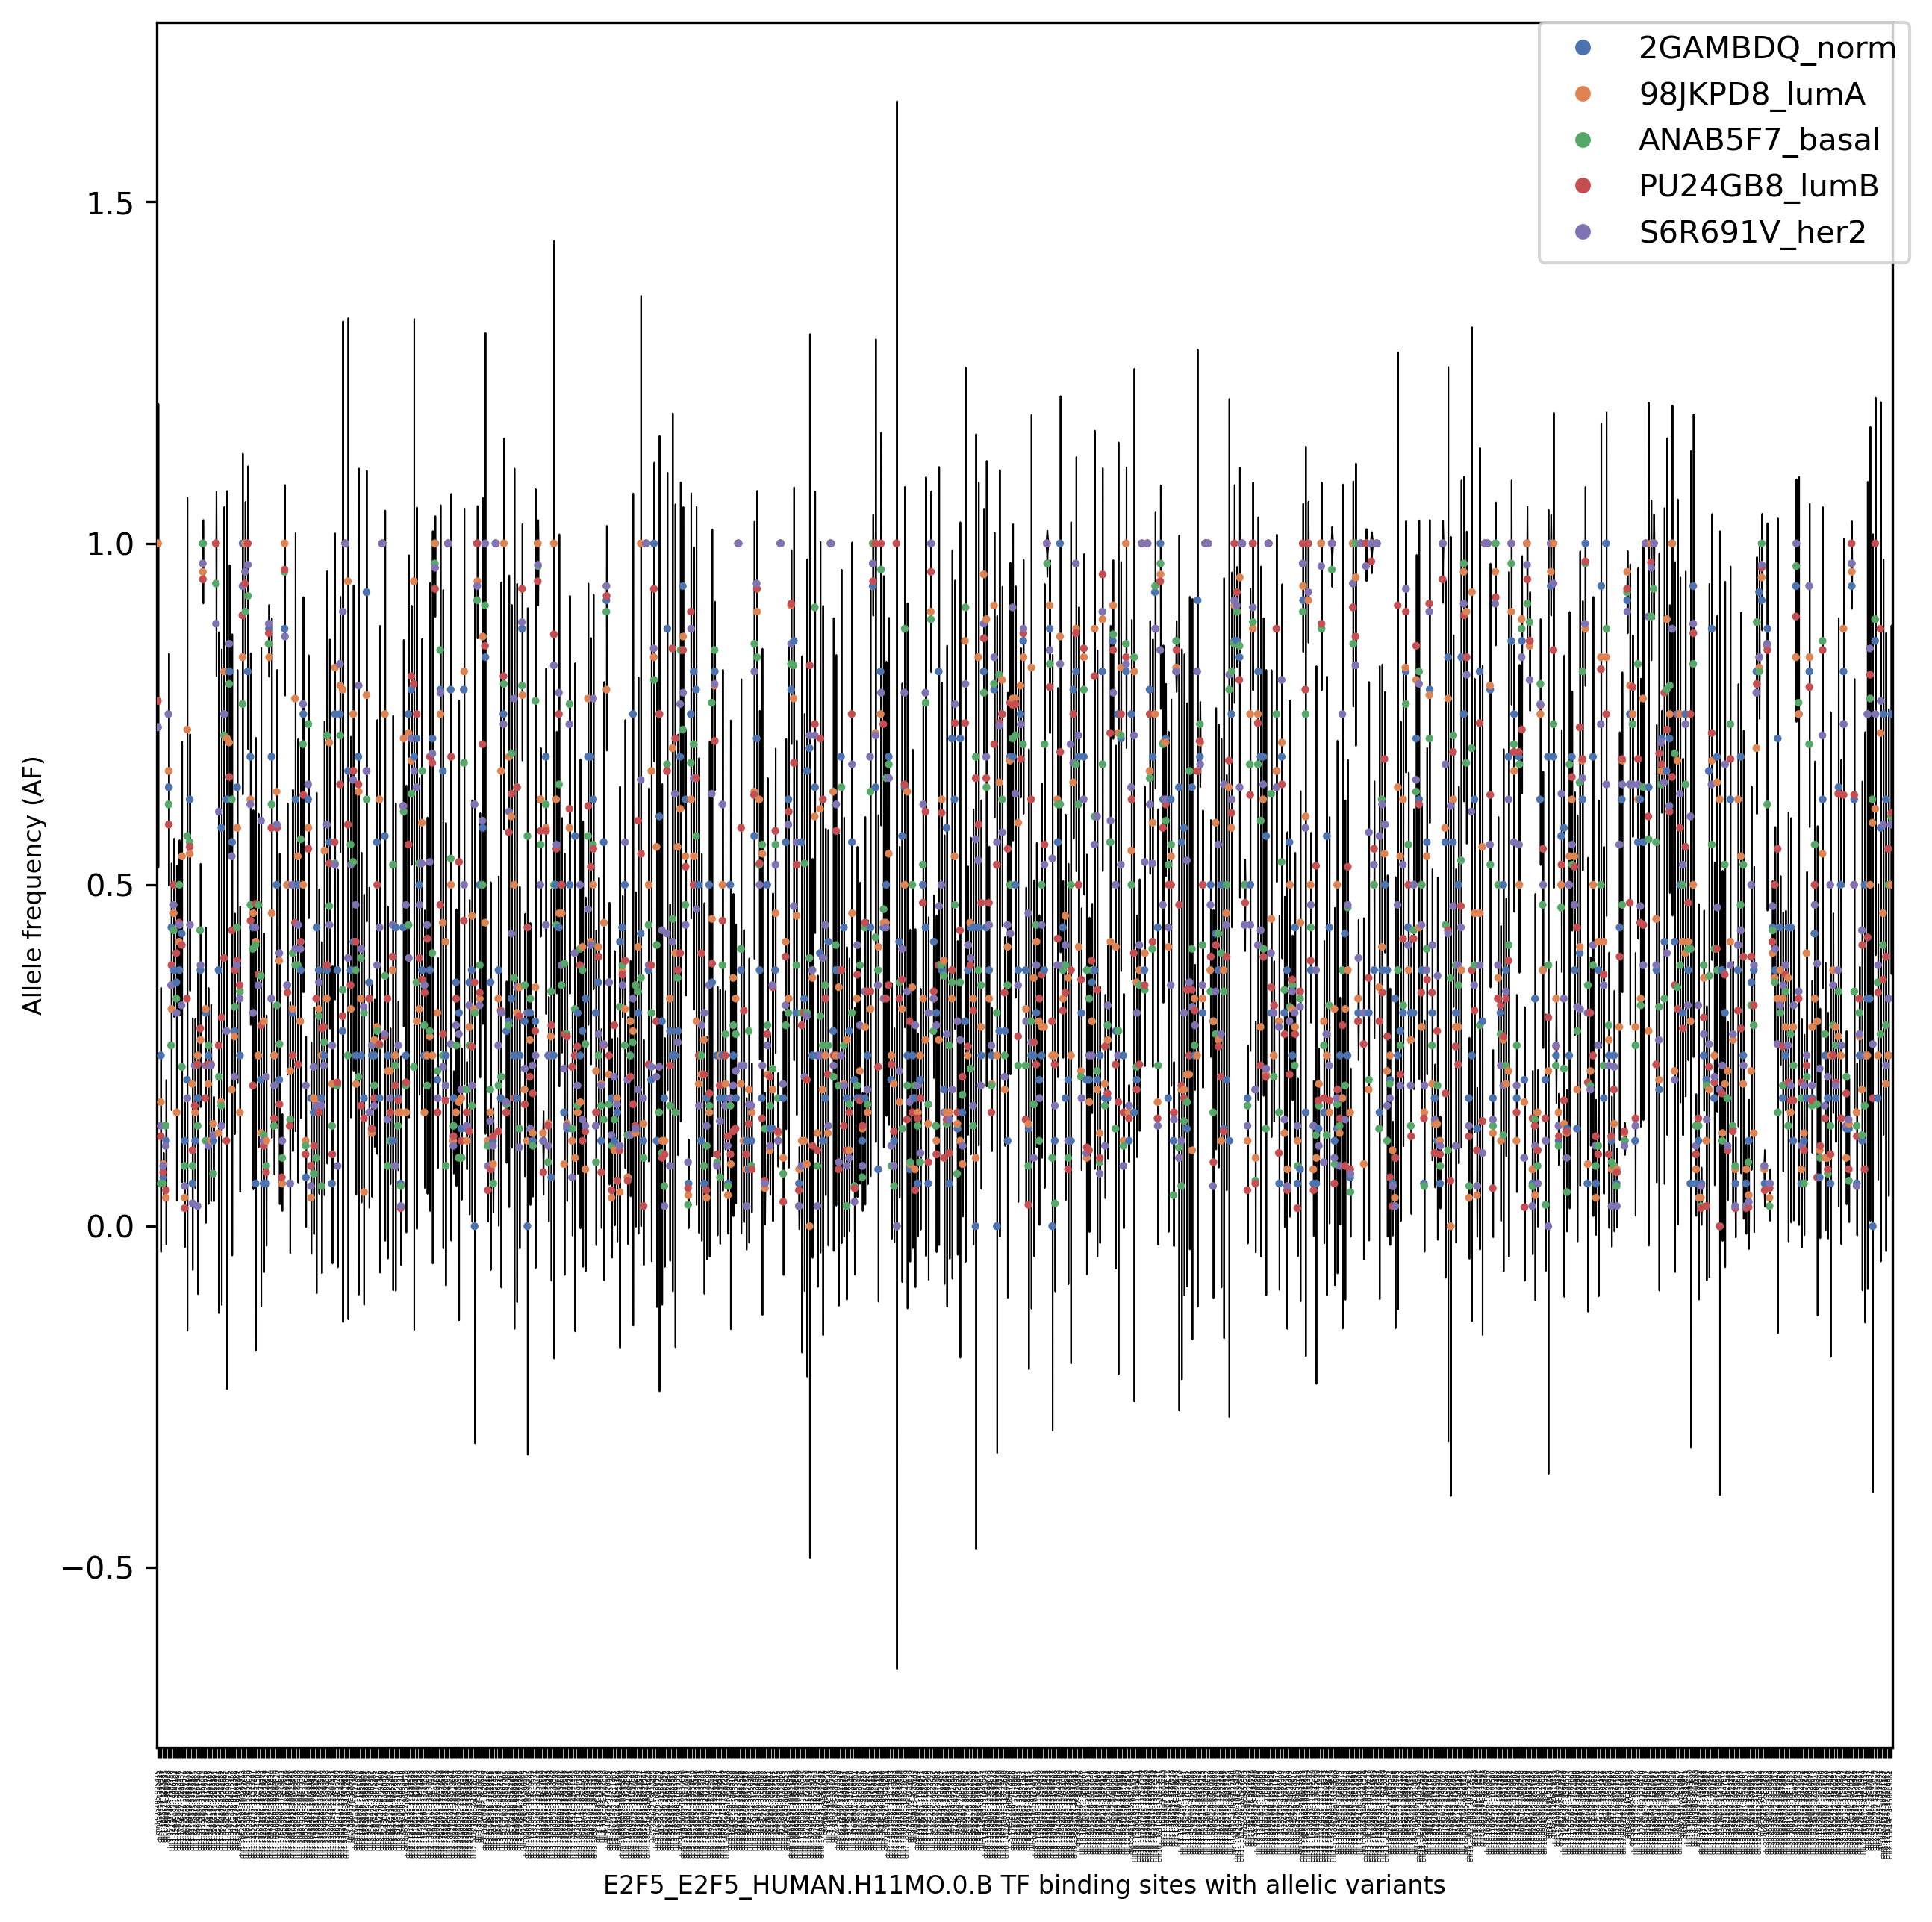

In [27]:
# plot violin plot for AF on the filtered dataframe
plt.figure(figsize=(10, 10), dpi=300)
sns.violinplot(x='region_id', y='AF', data=mf_df, color='lightgray', inner='quartile', linecolor='black', linewidth=0.5)
plt.xticks(rotation=90, fontsize=2)
sns.stripplot(x='region_id', y='AF', data=mf_df, hue='sample_id', size=2.5, jitter=True, palette='deep')


# plot legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=2, fontsize=10)
plt.xlabel(f'{motif_id} TF binding sites with allelic variants', fontsize=8)
plt.ylabel('Allele frequency (AF)', fontsize=8)
plt.show()

Plotting the whole data makes the plot look very busy. We can split the data into 2 groups: 'high AF' and 'low AF'. We will define 'high AF' as `AF_median` > 0.5, and 'low AF' as `AF_median` <= 0.5. 

In [28]:
# to ensure that each unique region_id is retained as a group of subtype rows, we need to filter after grouping per region_id
high_af = mf_df.groupby('region_id').filter(lambda x: (x['AF_median'] > 0.5).any())
high_af

region_id      sample_id        AF      FPS  FPS_scaled  \
0           chr1:925405-925415   2GAMBDQ_norm  1.000000  0.05586    0.026175   
1           chr1:925405-925415   98JKPD8_lumA  1.000000  0.09540    0.042012   
2           chr1:925405-925415  ANAB5F7_basal  0.730769  0.03670    0.018821   
3           chr1:925405-925415   PU24GB8_lumB  0.769231  0.05082    0.023798   
4           chr1:925405-925415   S6R691V_her2  0.730769  0.09011    0.044860   
...                        ...            ...       ...      ...         ...   
3285  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522    0.096162   
3286  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392    0.151456   
3287  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363    0.037761   
3288  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735    0.115831   
3289  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995    0.179197   

       FPS_var  FPS_scaled_var  AF_median    AF_var  
0     0.000659        0.000134   0.769231  0.019970  
1     0.000659        0.000134   0.769231  0.019970  
2     0.000659        0.000134   0.769231  0.019970  
3     0.000659        0.000134   0.769231  0.019970  
4     0.000659        0.000134   0.769231  0.019970  
...        ...             ...        ...       ...  
3285  0.013487        0.002941   0.600000  0.008072  
3286  0.013487        0.002941   0.600000  0.008072  
3287  0.013487        0.002941   0.600000  0.008072  
3288  0.013487        0.002941   0.600000  0.008072  
3289  0.013487        0.002941   0.600000  0.008072  

[1115 rows x 9 columns]

In [ ]:
# low_af = mf_df.groupby('region_id').filter(lambda x: (x['AF_median'] <= 0.5).any())
# low_af

In [ ]:
# # plot violin plot for high AF set
# plt.figure(figsize=(10, 10), dpi=300)
# sns.violinplot(x='region_id', y='AF', data=high_af, color='lightgray', inner='quartile', linecolor='black', linewidth=0.5)
# plt.xticks(rotation=90, fontsize=2)
# sns.stripplot(x='region_id', y='AF', data=high_af, hue='sample_id', size=2.5, jitter=True, palette='deep')


# # plot legend outside of the plot
# plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=2, fontsize=10)
# plt.xlabel(f'{motif_id} TF binding sites with allelic variants (median AF > 0.5)', fontsize=8)
# plt.ylabel('Allele frequency (AF)', fontsize=8)
# plt.show()

In [ ]:
# # plot violin plot for low AF set
# plt.figure(figsize=(10, 10), dpi=300)
# sns.violinplot(x='region_id', y='AF', data=low_af, color='lightgray', inner='quartile', linecolor='black', linewidth=0.5)
# plt.xticks(rotation=90, fontsize=2)
# sns.stripplot(x='region_id', y='AF', data=low_af, hue='sample_id', size=2.5, jitter=True, palette='deep')


# # plot legend outside of the plot
# plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=2, fontsize=10)
# plt.xlabel(f'{motif_id} TF binding sites with allelic variants (median AF <= 0.5)', fontsize=8)
# plt.ylabel('Allele frequency (AF)', fontsize=8)
# plt.show()

There are definitely sites that have individual subtype with AF == 0 retained, which means that there are sites with high variance. We can filter and plot only these regions to see which subtype it is.

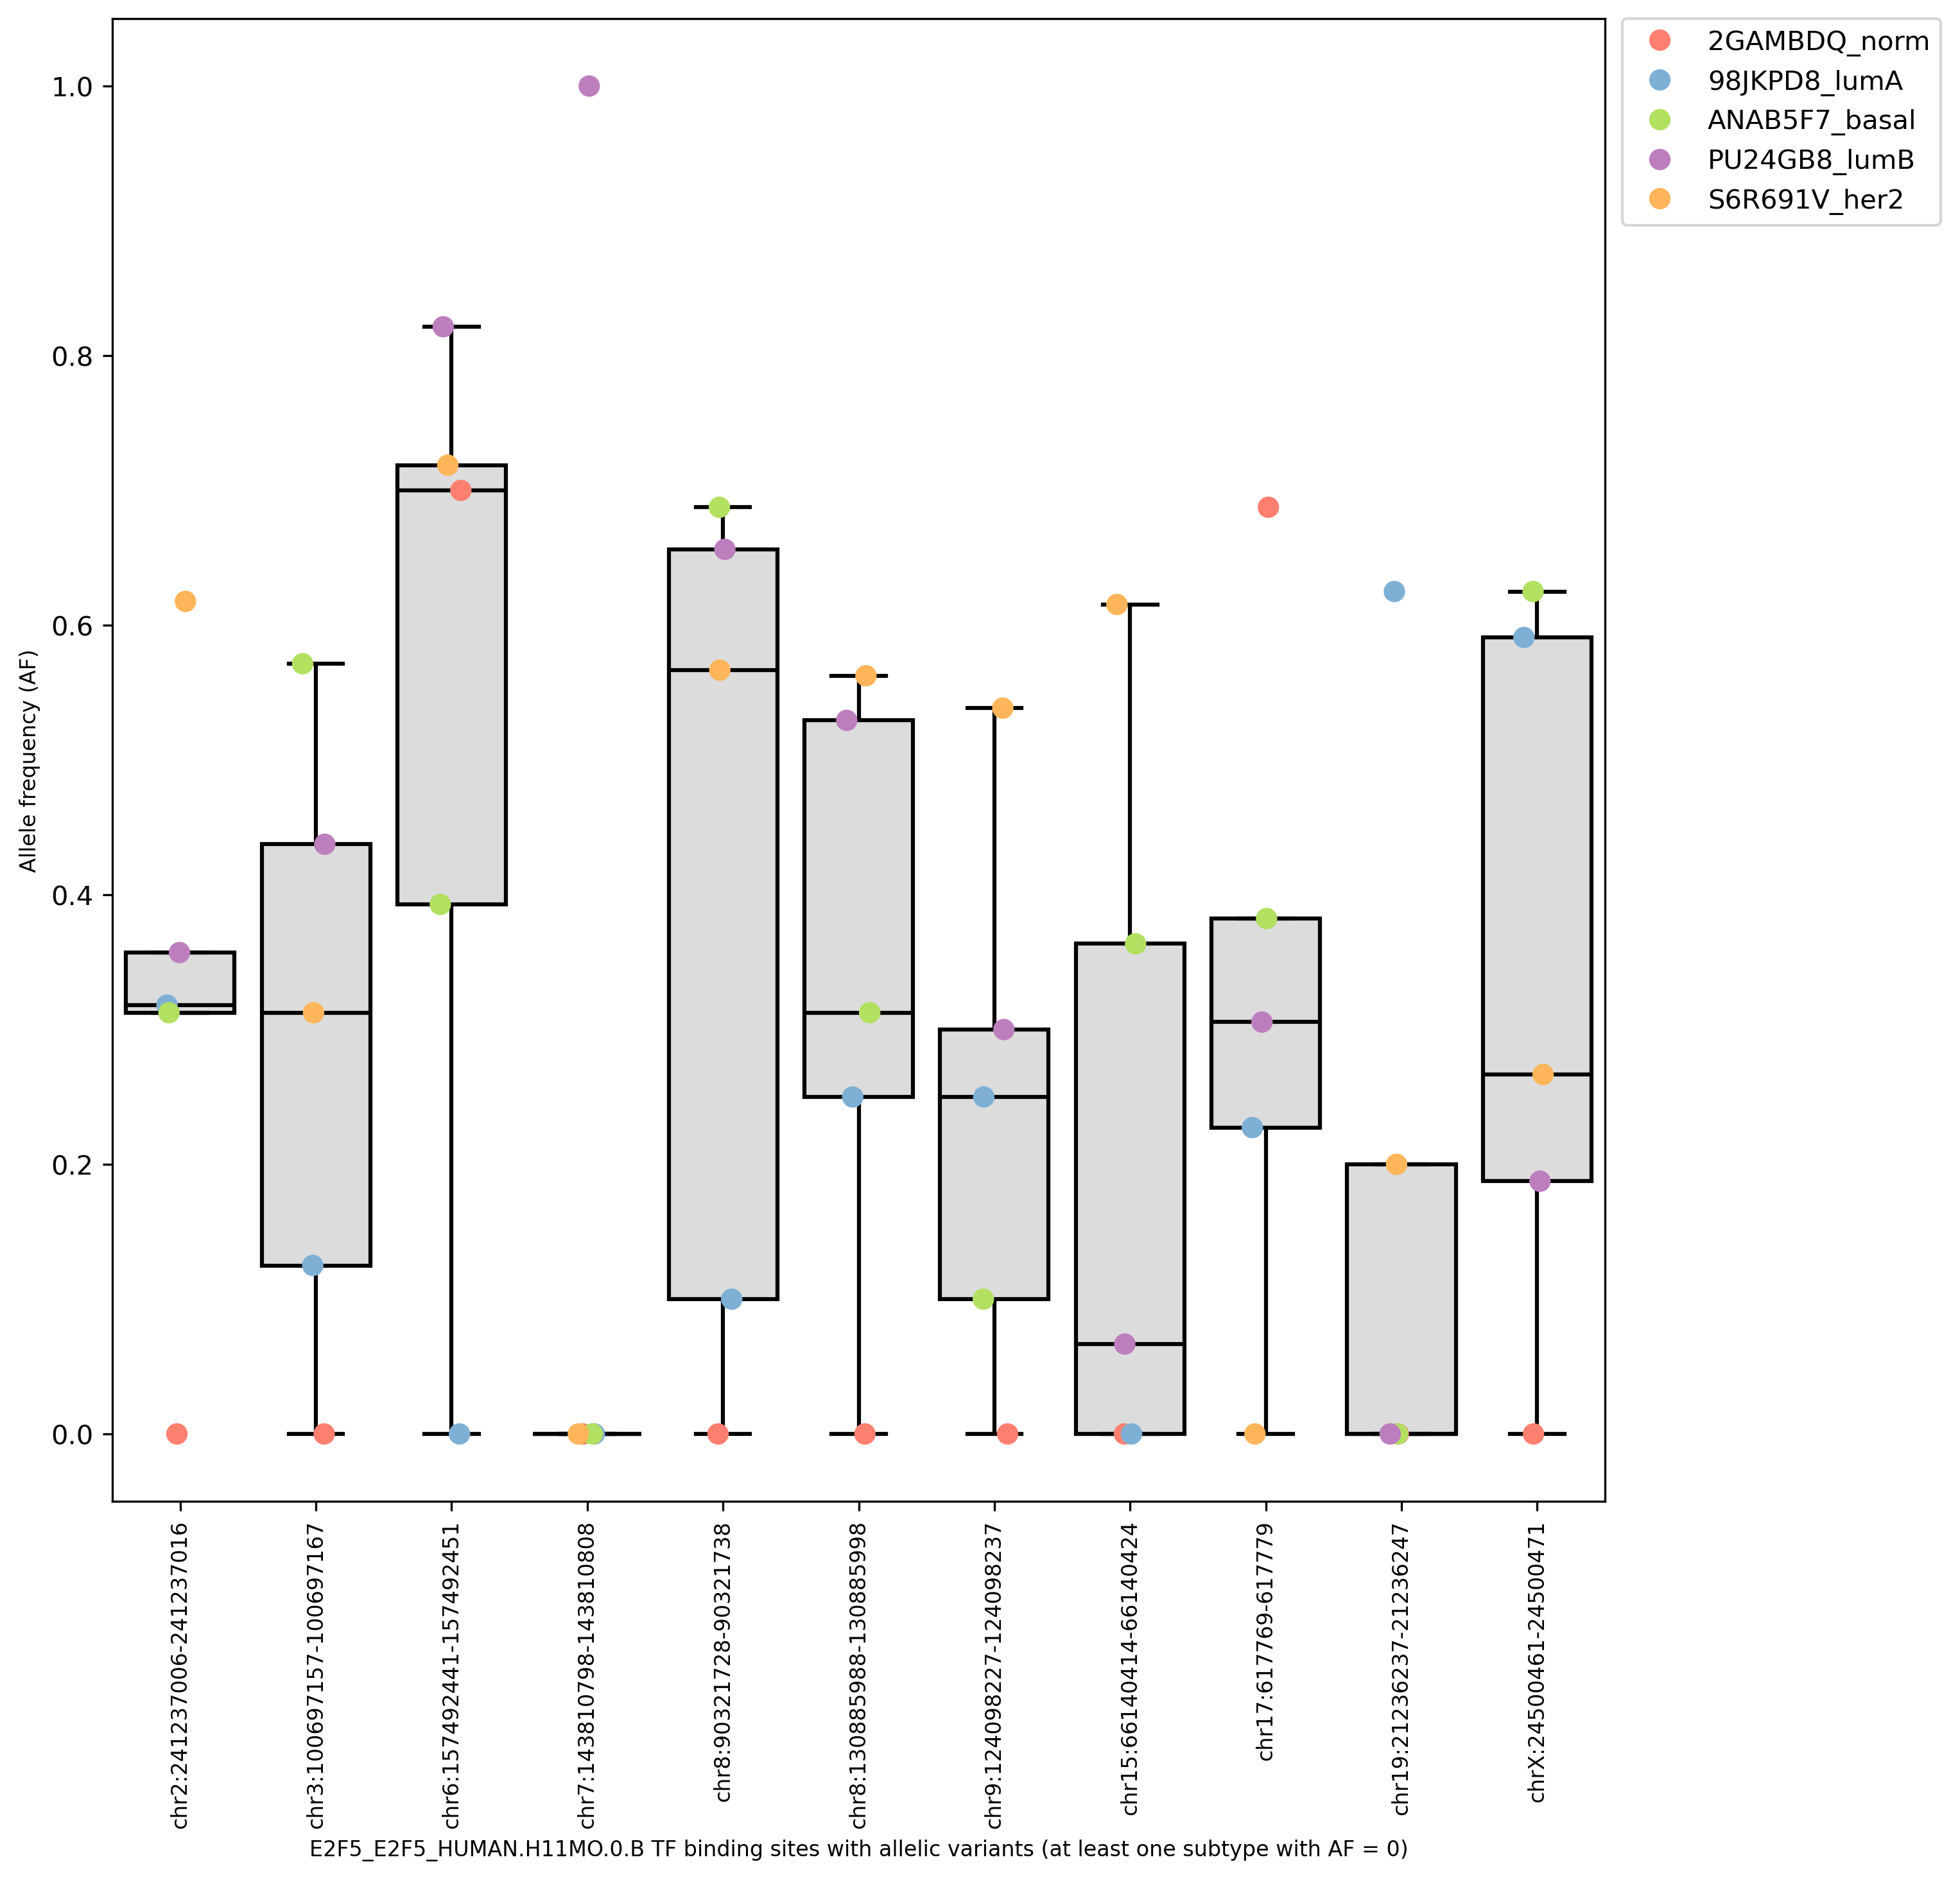

In [31]:
# plot violin plot for sites with at least one subtype with AF == 0
plt.figure(figsize=(10, 10), dpi=300)
sns.boxplot(x='region_id', y='AF', data=mf_df.groupby('region_id').filter(lambda x: (x['AF'] == 0).any()), color='gainsboro', linecolor='black', linewidth=1.5, showfliers=False)
plt.xticks(rotation=90, fontsize=8)
sns.stripplot(x='region_id', y='AF', data=mf_df.groupby('region_id').filter(lambda x: (x['AF'] == 0).any()), hue='sample_id', size=8, jitter=True, palette=springpastel)


# plot legend outside of the plot
plt.legend(bbox_to_anchor=(1.225, 1),borderaxespad=0, markerscale=1, fontsize=10)
plt.xlabel(f'{motif_id} TF binding sites with allelic variants (at least one subtype with AF = 0)', fontsize=8)
plt.ylabel('Allele frequency (AF)', fontsize=8)

plt.show()

No clear pattern of enrichment of a specific subtype with high AF compared to the rest can be seen. We can use the subset of these to plot the distribution of the associated FPS values (unscaled). 

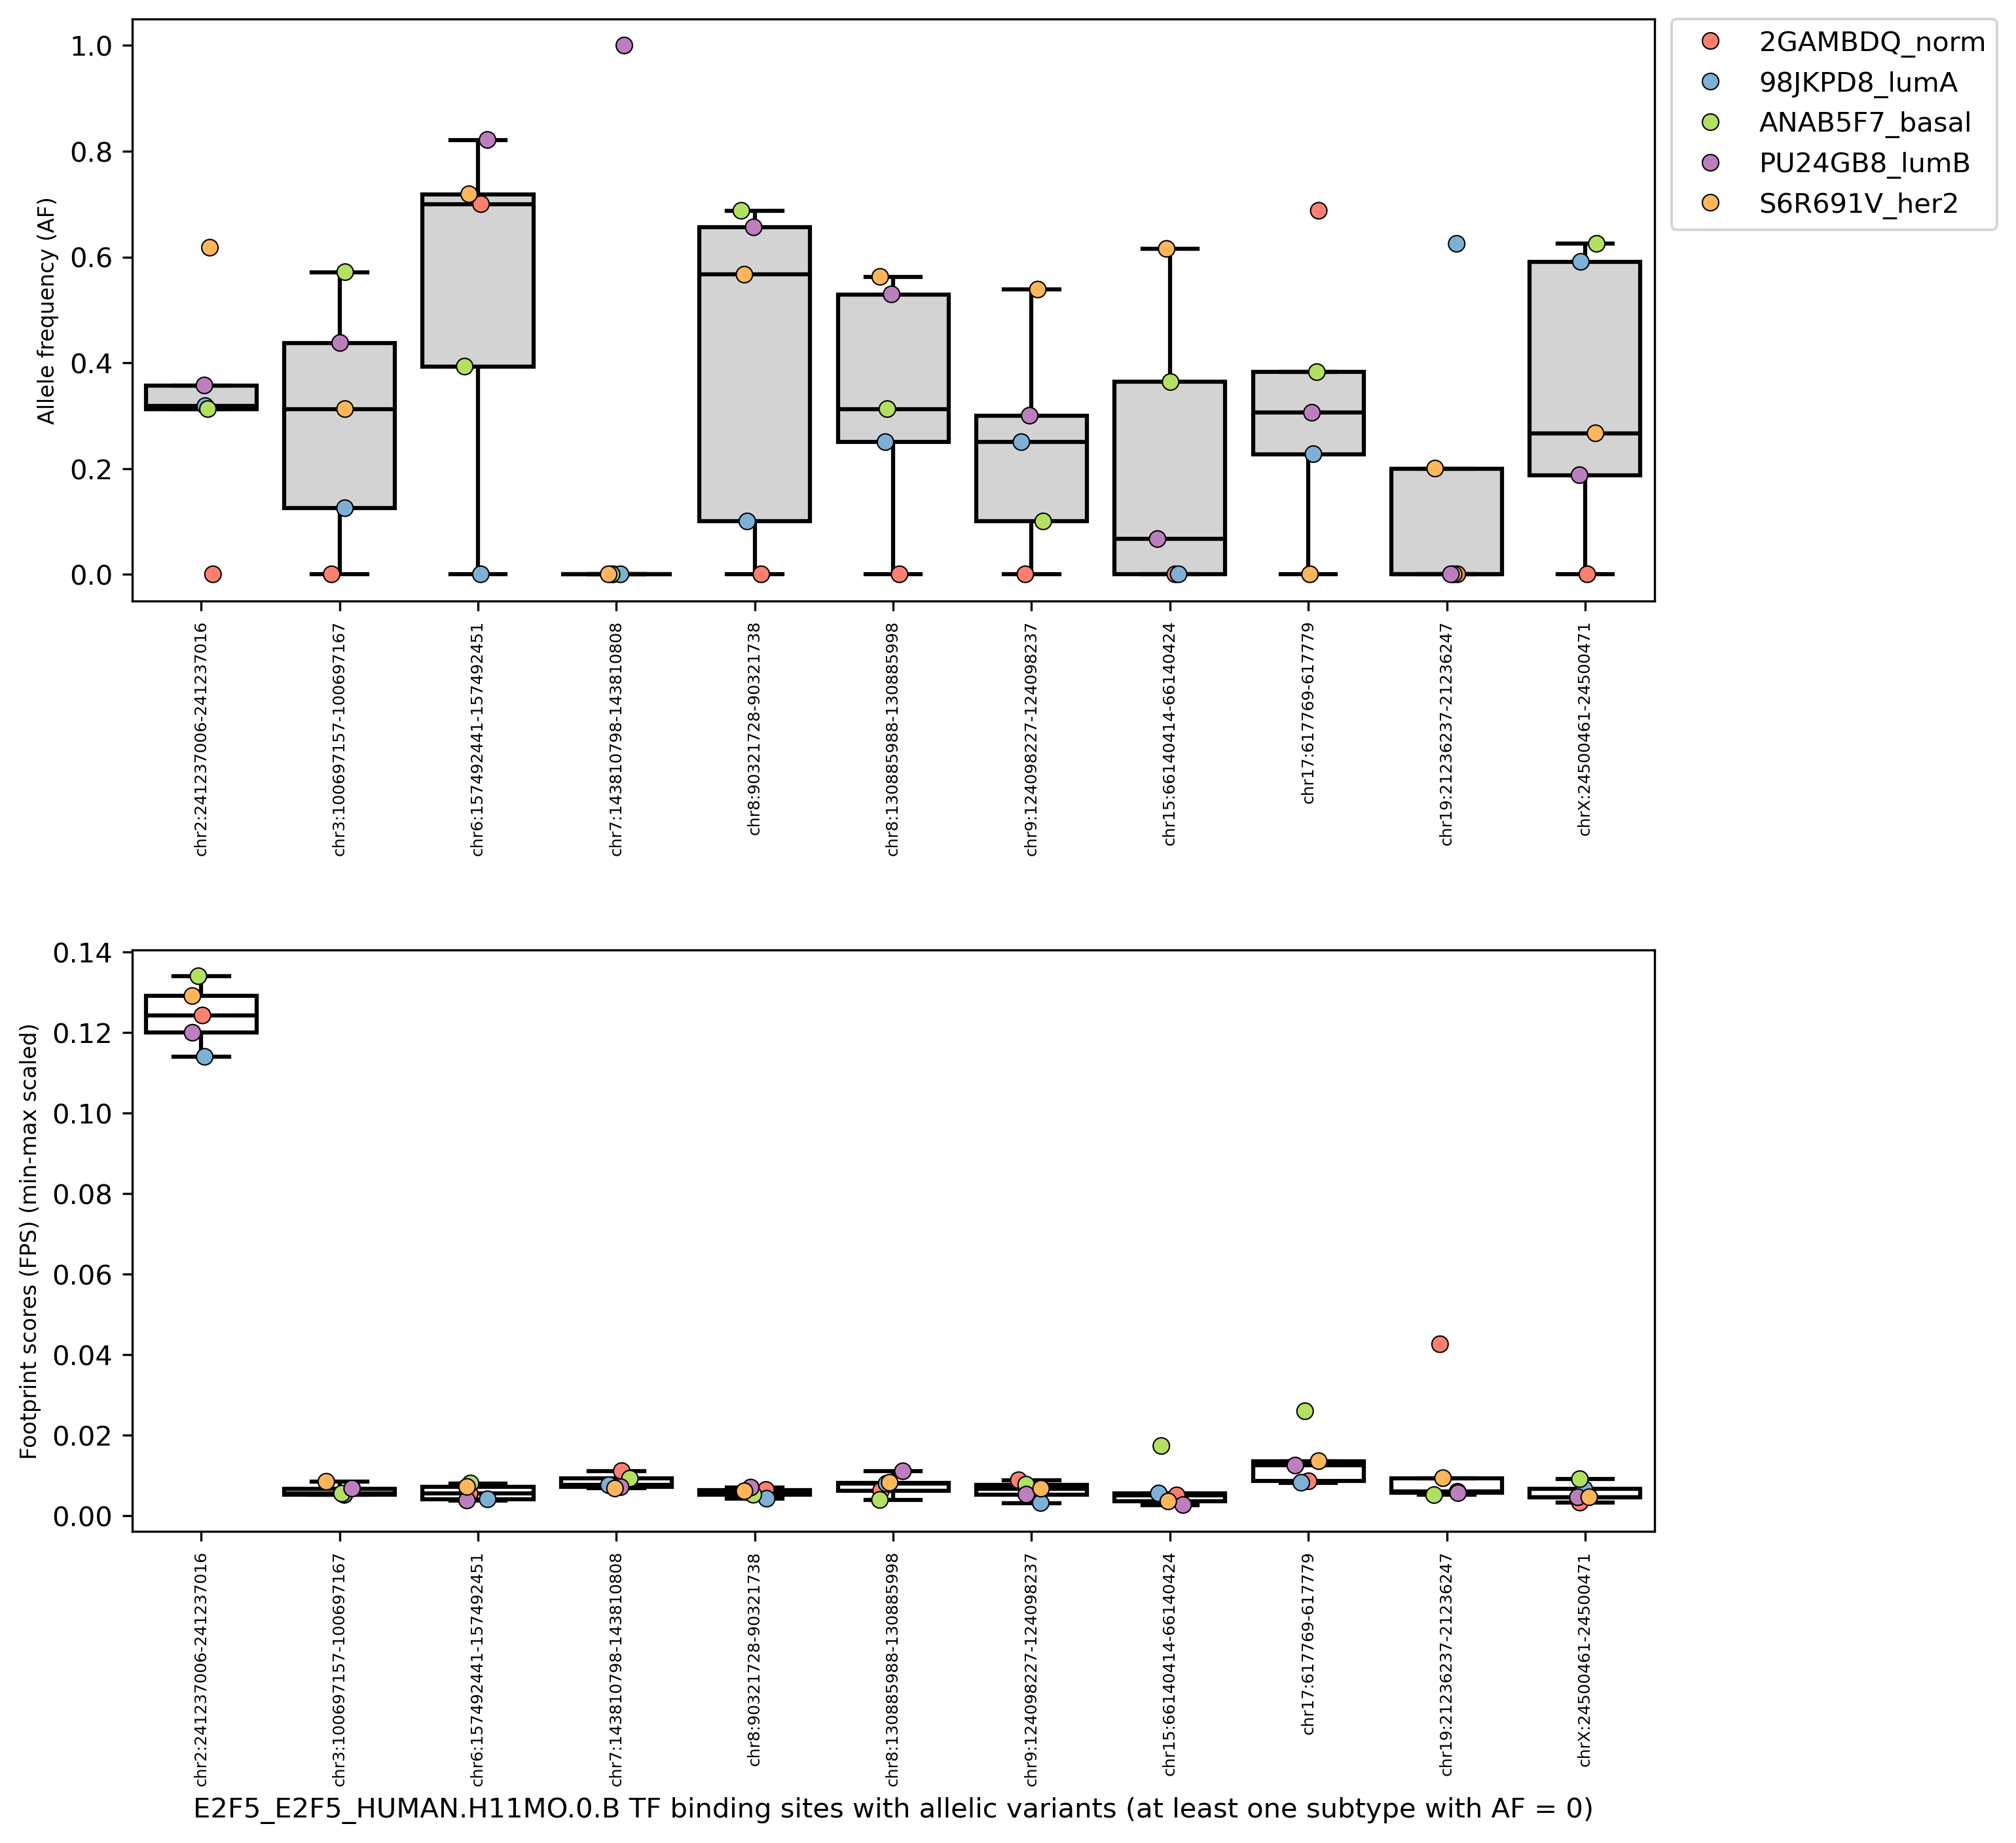

In [37]:
plt.figure(figsize=(10, 10), dpi=300)
plt.subplot(2, 1, 1)
sns.boxplot(x='region_id', y='AF', data=mf_df.groupby('region_id').filter(lambda x: (x['AF'] == 0).any()), color='lightgray', linecolor='black', linewidth=1.5, showfliers=False)
plt.xticks(rotation=90, fontsize=6)
sns.stripplot(x='region_id', y='AF', data=mf_df.groupby('region_id').filter(lambda x: (x['AF'] == 0).any()), hue='sample_id', size=6, jitter=True, palette=springpastel, linewidth=0.5, edgecolor='black')
# plot legend outside of the plot
plt.legend(bbox_to_anchor=(1.225, 1),borderaxespad=0, markerscale=1, fontsize=10)
plt.xlabel('')
plt.ylabel('Allele frequency (AF)', fontsize=8)

# then plot the scaled FPS values for these sites
plt.subplot(2, 1, 2)
sns.boxplot(x='region_id', y='FPS_scaled', data=mf_df.groupby('region_id').filter(lambda x: (x['AF'] == 0).any()), color='white', linecolor='black', linewidth=1.5, showfliers=False)
plt.xticks(rotation=90, fontsize=6)
sns.stripplot(x='region_id', y='FPS_scaled', data=mf_df.groupby('region_id').filter(lambda x: (x['AF'] == 0).any()), hue='sample_id', size=6, jitter=True, palette=springpastel, legend=False, linewidth=0.5, edgecolor='black')
plt.xlabel(f'{motif_id} TF binding sites with allelic variants (at least one subtype with AF = 0)', fontsize=10)
plt.ylabel(f'Footprint scores (FPS) (min-max scaled)', fontsize=8)
plt.subplots_adjust(hspace=0.6)
plt.show()

Some cancer subtypes appear to not have alternative alleles in certain sites but there is barely any pattern of enrichment in FPS values for any specific subtype.

In [38]:
high_af

region_id      sample_id        AF      FPS  FPS_scaled  \
0           chr1:925405-925415   2GAMBDQ_norm  1.000000  0.05586    0.026175   
1           chr1:925405-925415   98JKPD8_lumA  1.000000  0.09540    0.042012   
2           chr1:925405-925415  ANAB5F7_basal  0.730769  0.03670    0.018821   
3           chr1:925405-925415   PU24GB8_lumB  0.769231  0.05082    0.023798   
4           chr1:925405-925415   S6R691V_her2  0.730769  0.09011    0.044860   
...                        ...            ...       ...      ...         ...   
3285  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522    0.096162   
3286  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392    0.151456   
3287  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363    0.037761   
3288  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735    0.115831   
3289  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995    0.179197   

       FPS_var  FPS_scaled_var  AF_median    AF_var  
0     0.000659        0.000134   0.769231  0.019970  
1     0.000659        0.000134   0.769231  0.019970  
2     0.000659        0.000134   0.769231  0.019970  
3     0.000659        0.000134   0.769231  0.019970  
4     0.000659        0.000134   0.769231  0.019970  
...        ...             ...        ...       ...  
3285  0.013487        0.002941   0.600000  0.008072  
3286  0.013487        0.002941   0.600000  0.008072  
3287  0.013487        0.002941   0.600000  0.008072  
3288  0.013487        0.002941   0.600000  0.008072  
3289  0.013487        0.002941   0.600000  0.008072  

[1115 rows x 9 columns]

What is the range of FPS variance in the subset dataframe?

In [49]:
high_af[['FPS_scaled_var', 'AF_var']].describe()

FPS_scaled_var       AF_var
count    1.115000e+03  1115.000000
mean     4.116081e-04     0.016051
std      1.581157e-03     0.020156
min      2.684938e-07     0.000000
25%      4.518037e-06     0.002983
50%      1.968279e-05     0.008853
75%      1.232902e-04     0.020862
max      1.878826e-02     0.112277

In [39]:
# subset high_af for sites with FPS_var > 75th percentile + 1.5 * IQR
iqr = high_af['FPS_scaled_var'].quantile(q=0.75) - high_af['FPS_scaled_var'].quantile(q=0.25)
high_af_fps_outliers = high_af[high_af['FPS_scaled_var'] > high_af['FPS_scaled_var'].quantile(q=0.75) + (1.5 * iqr)]

In [40]:
# and then discard sites if it has AF_var == 0
high_nzaf_outliers = high_af_fps_outliers[high_af_fps_outliers['AF_var'] != 0]
high_nzaf_outliers

region_id      sample_id        AF      FPS  FPS_scaled  \
110     chr1:52055381-52055391   2GAMBDQ_norm  1.000000  0.17739    0.083121   
111     chr1:52055381-52055391   98JKPD8_lumA  1.000000  0.25634    0.112887   
112     chr1:52055381-52055391  ANAB5F7_basal  0.941176  0.24529    0.125796   
113     chr1:52055381-52055391   PU24GB8_lumB  1.000000  0.21208    0.099315   
114     chr1:52055381-52055391   S6R691V_her2  0.882353  0.24599    0.122464   
...                        ...            ...       ...      ...         ...   
3285  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522    0.096162   
3286  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392    0.151456   
3287  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363    0.037761   
3288  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735    0.115831   
3289  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995    0.179197   

       FPS_var  FPS_scaled_var  AF_median    AF_var  
110   0.001060        0.000310        1.0  0.002768  
111   0.001060        0.000310        1.0  0.002768  
112   0.001060        0.000310        1.0  0.002768  
113   0.001060        0.000310        1.0  0.002768  
114   0.001060        0.000310        1.0  0.002768  
...        ...             ...        ...       ...  
3285  0.013487        0.002941        0.6  0.008072  
3286  0.013487        0.002941        0.6  0.008072  
3287  0.013487        0.002941        0.6  0.008072  
3288  0.013487        0.002941        0.6  0.008072  
3289  0.013487        0.002941        0.6  0.008072  

[145 rows x 9 columns]

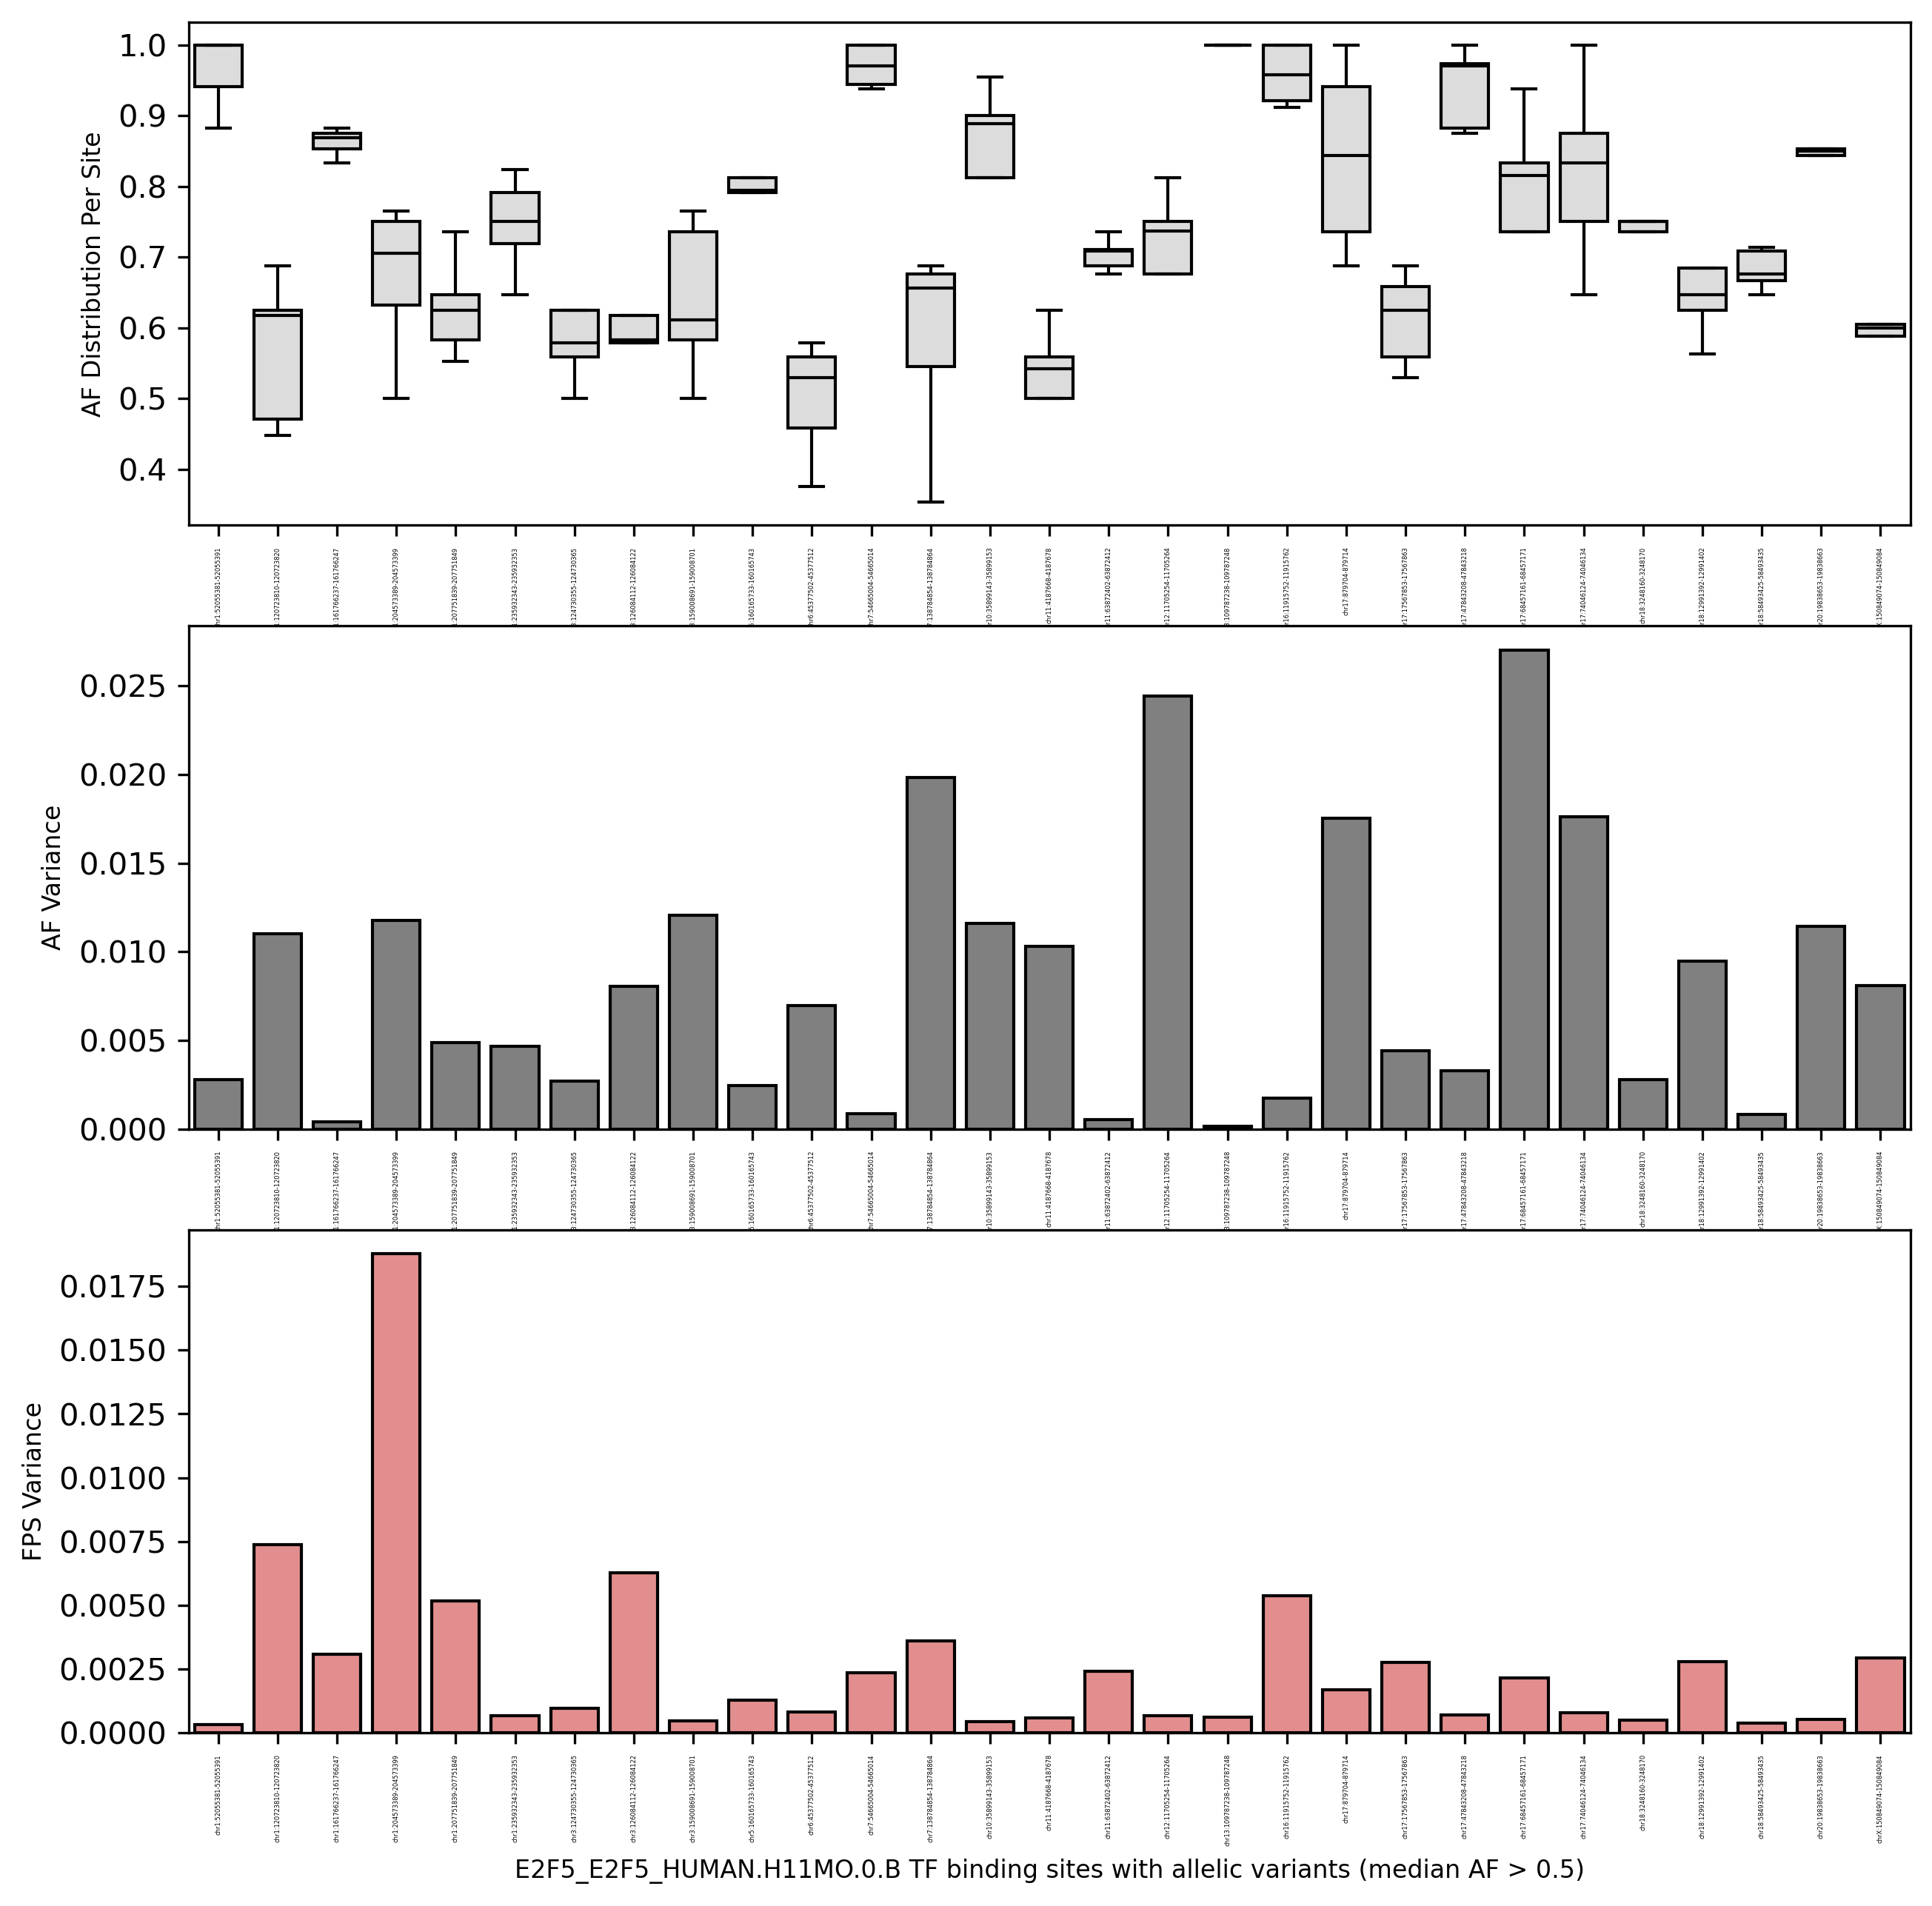

In [41]:
plt.figure(figsize=(10, 10), dpi=300)
# specify subplot
plt.subplot(3, 1, 1)
sns.boxplot(x='region_id', y='AF', data=high_nzaf_outliers, color='gainsboro', linecolor='black', showfliers=False)
plt.xticks(rotation=90, fontsize=2)
plt.xlabel('')
plt.ylabel('AF Distribution Per Site', fontsize=8)

plt.subplot(3, 1, 2)
sns.barplot(x='region_id', y='AF_var', data=high_nzaf_outliers, color='gray', edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel('')
plt.ylabel('AF Variance', fontsize=8)

plt.subplot(3, 1, 3)
sns.barplot(x='region_id', y='FPS_scaled_var', data=high_nzaf_outliers, color='lightcoral', edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
# plt.yscale('log')
plt.xlabel(f'{motif_id} TF binding sites with allelic variants (median AF > 0.5)', fontsize=8)
plt.ylabel('FPS Variance', fontsize=8)

plt.show()

In [42]:
high_af_uniq_reg = high_nzaf_outliers[['region_id', 'AF_var', 'FPS_scaled_var']].drop_duplicates()
# sort the region_id in the filtered high_af dataframe based on descending order of AF_var
afvar_uniqsort = high_af_uniq_reg.sort_values(by='AF_var', ascending=False)
# fpsvar_uniqsort = high_af_uniq_reg.sort_values(by='FPS_scaled_var', ascending=False)

Get the `region_id` ordered list based on AF/FPS variance in descending order.

In [43]:
# extract the region_id from the high_af_fps_var_df_uniqsort dataframe
sorted_region_ids = afvar_uniqsort['region_id']

Using the `region_id` array above, we can filter the `high_af` dataframe to only include the `region_id`s in the array.

In [44]:
high_nzaf_outliers

region_id      sample_id        AF      FPS  FPS_scaled  \
110     chr1:52055381-52055391   2GAMBDQ_norm  1.000000  0.17739    0.083121   
111     chr1:52055381-52055391   98JKPD8_lumA  1.000000  0.25634    0.112887   
112     chr1:52055381-52055391  ANAB5F7_basal  0.941176  0.24529    0.125796   
113     chr1:52055381-52055391   PU24GB8_lumB  1.000000  0.21208    0.099315   
114     chr1:52055381-52055391   S6R691V_her2  0.882353  0.24599    0.122464   
...                        ...            ...       ...      ...         ...   
3285  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522    0.096162   
3286  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392    0.151456   
3287  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363    0.037761   
3288  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735    0.115831   
3289  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995    0.179197   

       FPS_var  FPS_scaled_var  AF_median    AF_var  
110   0.001060        0.000310        1.0  0.002768  
111   0.001060        0.000310        1.0  0.002768  
112   0.001060        0.000310        1.0  0.002768  
113   0.001060        0.000310        1.0  0.002768  
114   0.001060        0.000310        1.0  0.002768  
...        ...             ...        ...       ...  
3285  0.013487        0.002941        0.6  0.008072  
3286  0.013487        0.002941        0.6  0.008072  
3287  0.013487        0.002941        0.6  0.008072  
3288  0.013487        0.002941        0.6  0.008072  
3289  0.013487        0.002941        0.6  0.008072  

[145 rows x 9 columns]

In [45]:
# Change 'region_id' to a categorical variable with the categories ordered by 'fps_sorted_region_ids'
df_copy = high_nzaf_outliers.copy()
df_copy['region_id'] = pd.Categorical(high_nzaf_outliers['region_id'], categories=sorted_region_ids, ordered=True)

# Filter the DataFrame
high_nzaf_outlie_filt = df_copy[df_copy['region_id'].isin(sorted_region_ids)]

# Sort the DataFrame by 'region_id'
high_nzaf_outlie_filt = high_nzaf_outlie_filt.sort_values('region_id')
high_nzaf_outlie_filt

region_id      sample_id        AF      FPS  FPS_scaled  \
2737    chr17:68457161-68457171  ANAB5F7_basal  0.500000  0.30407    0.155941   
2735    chr17:68457161-68457171   2GAMBDQ_norm  0.937500  0.31338    0.146843   
2736    chr17:68457161-68457171   98JKPD8_lumA  0.833333  0.40817    0.179750   
2738    chr17:68457161-68457171   PU24GB8_lumB  0.815789  0.38859    0.181973   
2739    chr17:68457161-68457171   S6R691V_her2  0.735294  0.52970    0.263706   
...                         ...            ...       ...      ...         ...   
2300  chr13:109787238-109787248   2GAMBDQ_norm  1.000000  0.21705    0.101705   
2301  chr13:109787238-109787248   98JKPD8_lumA  1.000000  0.15718    0.069219   
2302  chr13:109787238-109787248  ANAB5F7_basal  1.000000  0.20418    0.104713   
2303  chr13:109787238-109787248   PU24GB8_lumB  0.973684  0.21274    0.099624   
2304  chr13:109787238-109787248   S6R691V_her2  1.000000  0.09956    0.049565   

       FPS_var  FPS_scaled_var  AF_median    AF_var  
2737  0.008274        0.002132   0.815789  0.027028  
2735  0.008274        0.002132   0.815789  0.027028  
2736  0.008274        0.002132   0.815789  0.027028  
2738  0.008274        0.002132   0.815789  0.027028  
2739  0.008274        0.002132   0.815789  0.027028  
...        ...             ...        ...       ...  
2300  0.002501        0.000597   1.000000  0.000139  
2301  0.002501        0.000597   1.000000  0.000139  
2302  0.002501        0.000597   1.000000  0.000139  
2303  0.002501        0.000597   1.000000  0.000139  
2304  0.002501        0.000597   1.000000  0.000139  

[145 rows x 9 columns]

Next, sort the sample_id values per each unique region_id by a specific order. This order is based on the lexicographic order of the sample_id values in the original matrix.

In [46]:
# get unique sample_id values into a list to define a categorical order
datasets = high_nzaf_outlie_filt['sample_id'].unique().tolist()
datasets = sorted(datasets)

# Create a categorical variable with ordered categories
dataset_copy = high_nzaf_outlie_filt.copy()
dataset_copy['sample_id'] = pd.Categorical(dataset_copy['sample_id'], categories=datasets, ordered=True)

# Sort 'sample_id' within each 'region_id'
high_nzaf_outlie_filtsort = dataset_copy.groupby('region_id', sort=False, observed=False).apply(lambda x: x.sort_values('sample_id')).reset_index(drop=True)

high_nzaf_outlie_filtsort


region_id      sample_id        AF      FPS  FPS_scaled  \
0      chr17:68457161-68457171   2GAMBDQ_norm  0.937500  0.31338    0.146843   
1      chr17:68457161-68457171   98JKPD8_lumA  0.833333  0.40817    0.179750   
2      chr17:68457161-68457171  ANAB5F7_basal  0.500000  0.30407    0.155941   
3      chr17:68457161-68457171   PU24GB8_lumB  0.815789  0.38859    0.181973   
4      chr17:68457161-68457171   S6R691V_her2  0.735294  0.52970    0.263706   
..                         ...            ...       ...      ...         ...   
140  chr13:109787238-109787248   2GAMBDQ_norm  1.000000  0.21705    0.101705   
141  chr13:109787238-109787248   98JKPD8_lumA  1.000000  0.15718    0.069219   
142  chr13:109787238-109787248  ANAB5F7_basal  1.000000  0.20418    0.104713   
143  chr13:109787238-109787248   PU24GB8_lumB  0.973684  0.21274    0.099624   
144  chr13:109787238-109787248   S6R691V_her2  1.000000  0.09956    0.049565   

      FPS_var  FPS_scaled_var  AF_median    AF_var  
0    0.008274        0.002132   0.815789  0.027028  
1    0.008274        0.002132   0.815789  0.027028  
2    0.008274        0.002132   0.815789  0.027028  
3    0.008274        0.002132   0.815789  0.027028  
4    0.008274        0.002132   0.815789  0.027028  
..        ...             ...        ...       ...  
140  0.002501        0.000597   1.000000  0.000139  
141  0.002501        0.000597   1.000000  0.000139  
142  0.002501        0.000597   1.000000  0.000139  
143  0.002501        0.000597   1.000000  0.000139  
144  0.002501        0.000597   1.000000  0.000139  

[145 rows x 9 columns]

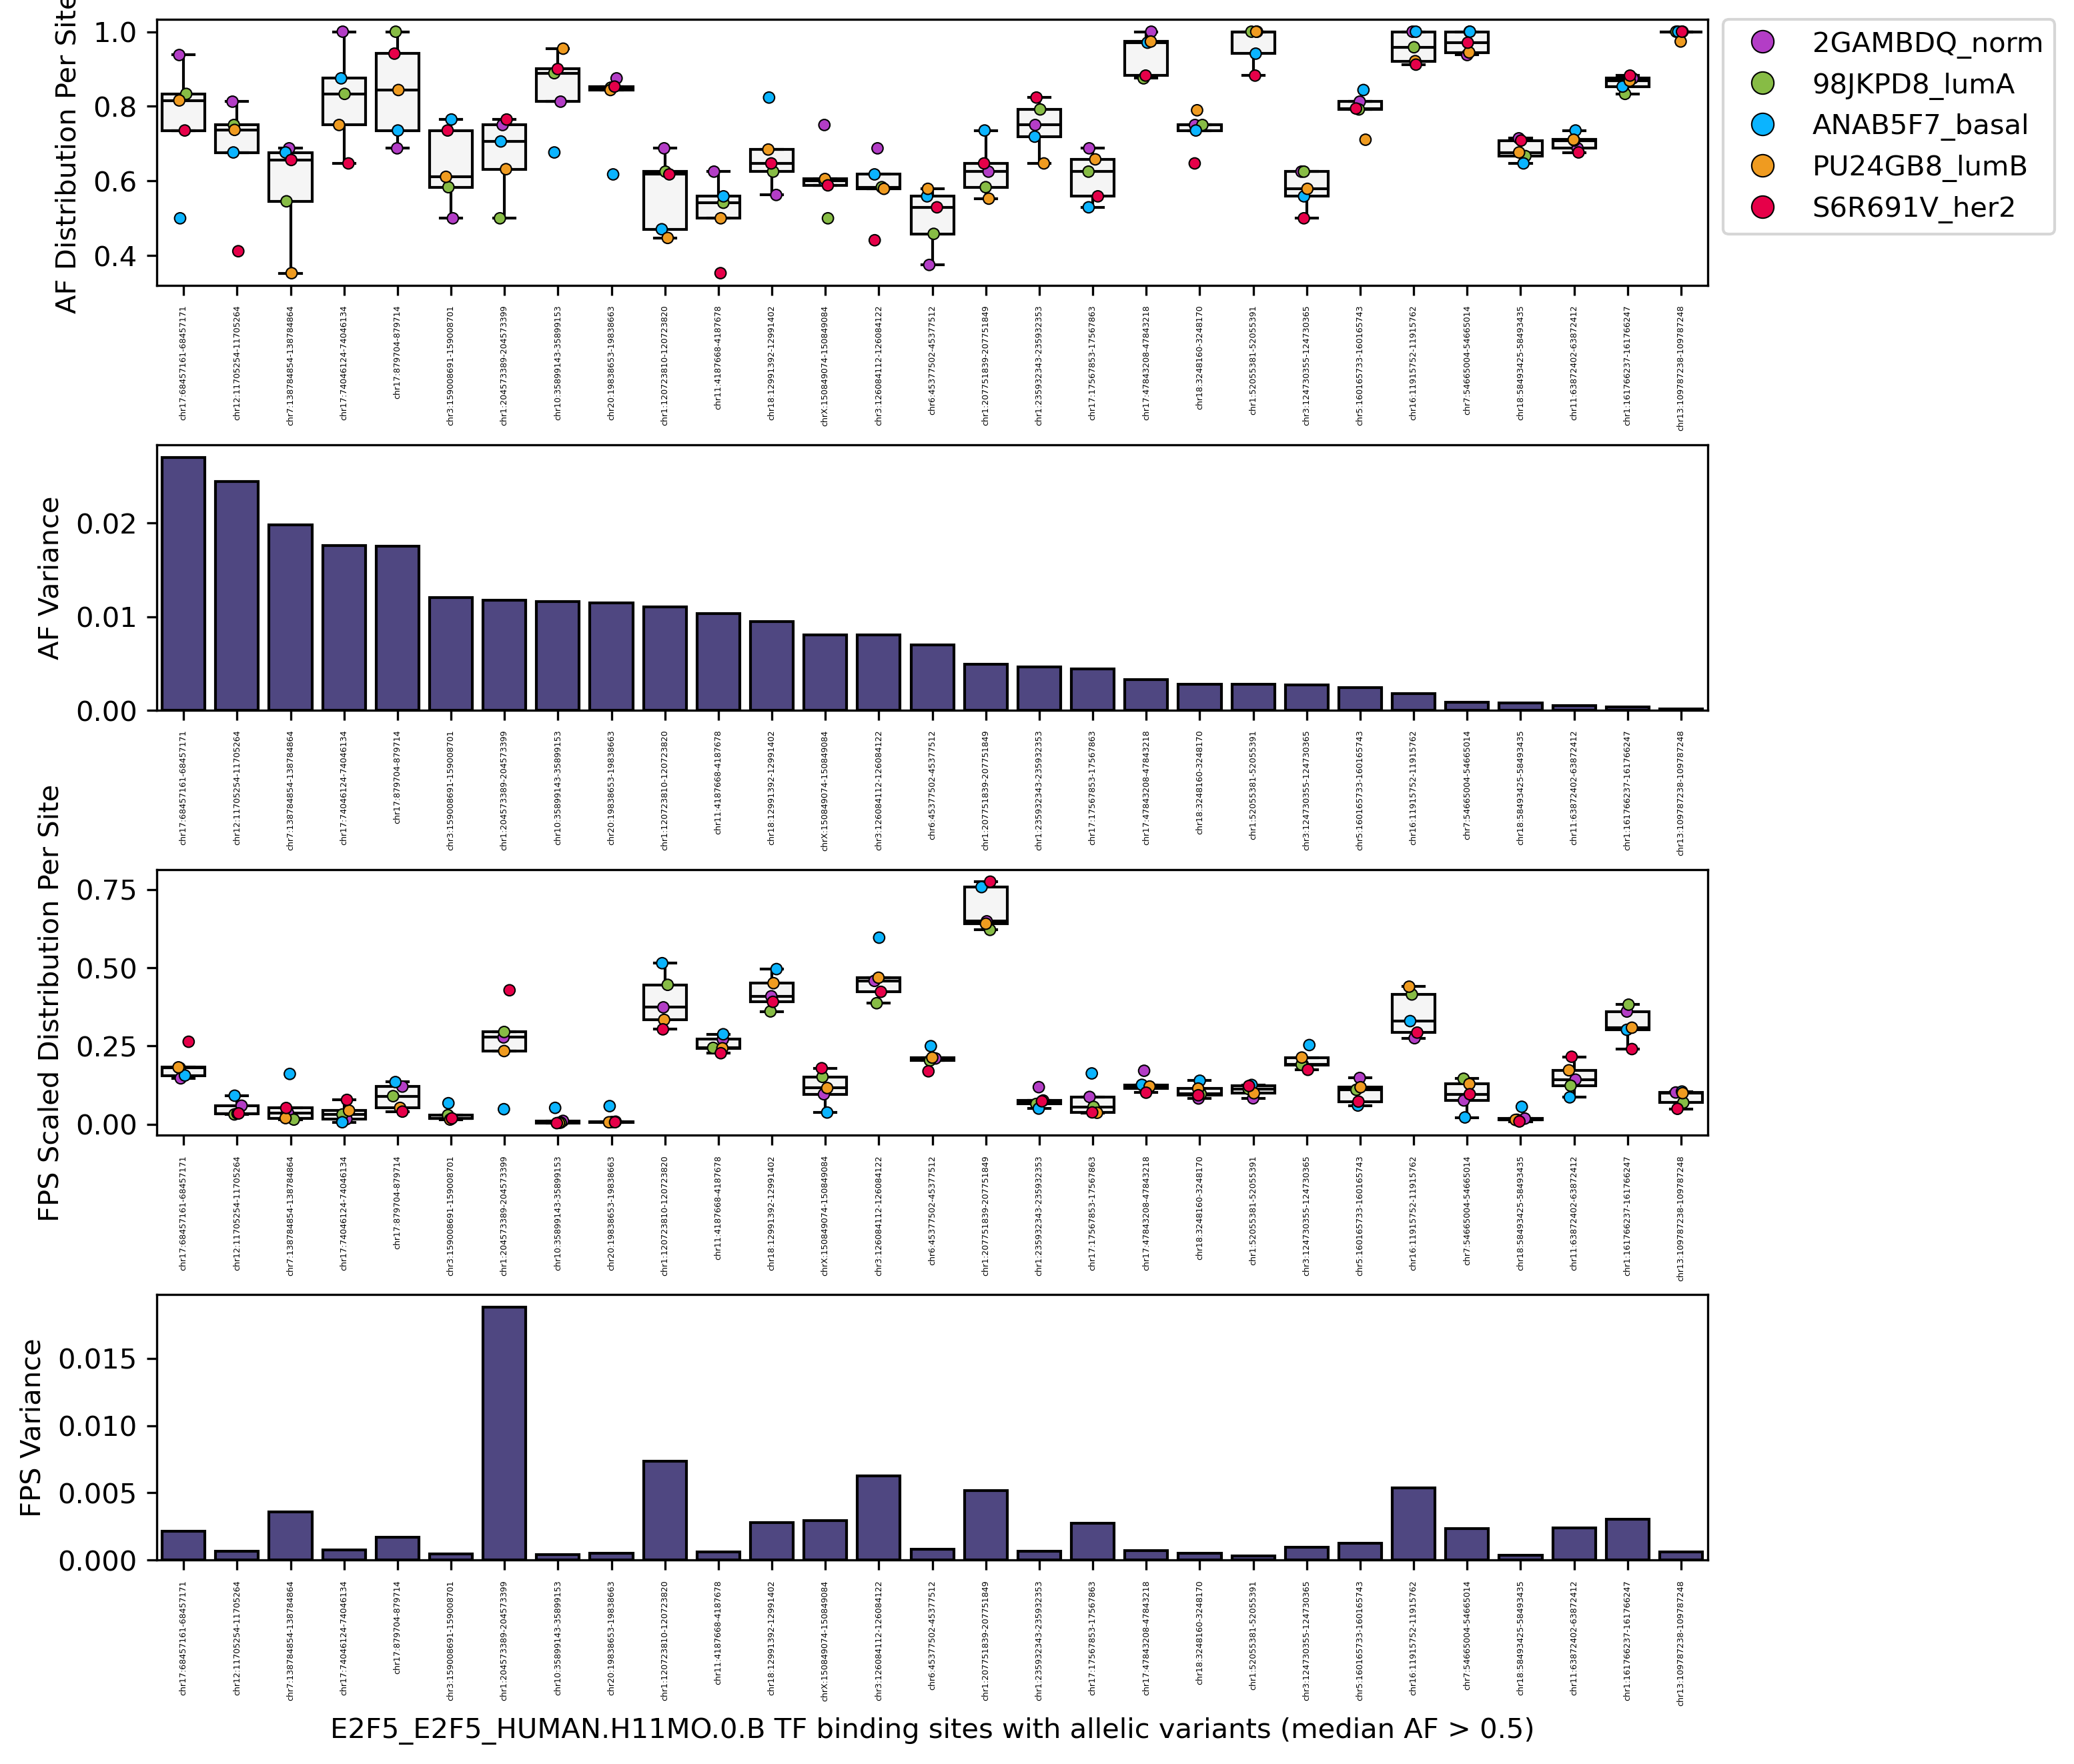

In [50]:
# create color dictionary
dutchfield_colordict = {'S6R691V_her2': "#e60049", 'ANAB5F7_basal': "#0bb4ff", '98JKPD8_lumA': "#87bc45", 'PU24GB8_lumB': "#ef9b20", '2GAMBDQ_norm': "#b33dc6"}
plt.figure(figsize=(10, 10), dpi=300)
# specify subplot
plt.subplot(4, 1, 1)
sns.boxplot(x='region_id', y='AF', data=high_nzaf_outlie_filtsort, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='AF', data=high_nzaf_outlie_filtsort, hue='sample_id', palette=dutchfield_colordict, size=4, jitter=True, linewidth=0.5, edgecolor='black')
plt.xticks(rotation=90, fontsize=3)
plt.xlabel('')
plt.ylabel('AF Distribution Per Site', fontsize=10)
# place legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=2, fontsize=10)

plt.subplot(4, 1, 2)
sns.barplot(x='region_id', y='AF_var', data=high_nzaf_outlie_filtsort, color='darkslateblue', edgecolor='black')
plt.xticks(rotation=90, fontsize=3)
plt.xlabel('')
plt.ylabel('AF Variance', fontsize=10)
  
plt.subplot(4, 1, 3)
sns.boxplot(x='region_id', y='FPS_scaled', data=high_nzaf_outlie_filtsort, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='FPS_scaled', data=high_nzaf_outlie_filtsort, hue='sample_id', palette=dutchfield_colordict, size=4, jitter=True, legend=False, linewidth=0.5, edgecolor='black')
plt.xticks(rotation=90, fontsize=3)
plt.xlabel('')
plt.ylabel('FPS Scaled Distribution Per Site', fontsize=10)

plt.subplot(4, 1, 4)
sns.barplot(x='region_id', y='FPS_scaled_var', data=high_nzaf_outlie_filtsort, color='darkslateblue', edgecolor='black')
plt.xticks(rotation=90, fontsize=3)
plt.xlabel(f'{motif_id} TF binding sites with allelic variants (median AF > 0.5)', fontsize=10)
plt.ylabel('FPS Variance', fontsize=10)
plt.subplots_adjust(hspace=0.6)
plt.show()

For FPS distribution there are subtypes that are more represented that others. Let's try to selectively highlight subtypes which are the maxima per site. 

In [81]:
high_nzaf_outlie_filt

region_id      sample_id        AF      FPS  FPS_scaled  \
2737    chr17:68457161-68457171  ANAB5F7_basal  0.500000  0.30407    0.155941   
2735    chr17:68457161-68457171   2GAMBDQ_norm  0.937500  0.31338    0.146843   
2736    chr17:68457161-68457171   98JKPD8_lumA  0.833333  0.40817    0.179750   
2738    chr17:68457161-68457171   PU24GB8_lumB  0.815789  0.38859    0.181973   
2739    chr17:68457161-68457171   S6R691V_her2  0.735294  0.52970    0.263706   
...                         ...            ...       ...      ...         ...   
2300  chr13:109787238-109787248   2GAMBDQ_norm  1.000000  0.21705    0.101705   
2301  chr13:109787238-109787248   98JKPD8_lumA  1.000000  0.15718    0.069219   
2302  chr13:109787238-109787248  ANAB5F7_basal  1.000000  0.20418    0.104713   
2303  chr13:109787238-109787248   PU24GB8_lumB  0.973684  0.21274    0.099624   
2304  chr13:109787238-109787248   S6R691V_her2  1.000000  0.09956    0.049565   

       FPS_var  FPS_scaled_var  AF_median    AF_var  
2737  0.008274        0.002132   0.815789  0.027028  
2735  0.008274        0.002132   0.815789  0.027028  
2736  0.008274        0.002132   0.815789  0.027028  
2738  0.008274        0.002132   0.815789  0.027028  
2739  0.008274        0.002132   0.815789  0.027028  
...        ...             ...        ...       ...  
2300  0.002501        0.000597   1.000000  0.000139  
2301  0.002501        0.000597   1.000000  0.000139  
2302  0.002501        0.000597   1.000000  0.000139  
2303  0.002501        0.000597   1.000000  0.000139  
2304  0.002501        0.000597   1.000000  0.000139  

[145 rows x 9 columns]

In [94]:
# Find the index of the max FPS_scaled value for each region_id
idx_max = high_nzaf_outlie_filtsort.groupby('region_id', observed=True)['FPS_scaled'].idxmax()
idx_min = high_nzaf_outlie_filtsort.groupby('region_id', observed=True)['FPS_scaled'].idxmin()
# Select the corresponding rows
max_fps_scaled = high_nzaf_outlie_filtsort.loc[idx_max]
min_fps_scaled = high_nzaf_outlie_filtsort.loc[idx_min]

# do the same for AF
idx_max_af = high_nzaf_outlie_filtsort.groupby('region_id', observed=True)['AF'].idxmax()
idx_min_af = high_nzaf_outlie_filtsort.groupby('region_id', observed=True)['AF'].idxmin()
# Select the corresponding rows
max_af_raw = high_nzaf_outlie_filtsort.loc[idx_max_af]
min_af_raw = high_nzaf_outlie_filtsort.loc[idx_min_af]

In [95]:
# create masks for the inverse of max and min values
mask = ~high_nzaf_outlie_filtsort.index.isin(idx_max)
max_fps_scaled_inv = high_nzaf_outlie_filtsort[mask]

mask = ~high_nzaf_outlie_filtsort.index.isin(idx_min)
min_fps_scaled_inv = high_nzaf_outlie_filtsort[mask]

# do the same for AF
mask = ~high_nzaf_outlie_filtsort.index.isin(idx_max_af)
max_af_raw_inv = high_nzaf_outlie_filtsort[mask]

mask = ~high_nzaf_outlie_filtsort.index.isin(idx_min_af)
min_af_raw_inv = high_nzaf_outlie_filtsort[mask]

In [96]:
# create color dictionary
color_dict = {'S6R691V_her2': "#e60049", 'ANAB5F7_basal': "#0bb4ff", '98JKPD8_lumA': "#87bc45", 'PU24GB8_lumB': "#ef9b20", '2GAMBDQ_norm': "#b33dc6"}
gray = 'lightgray'
color_gray_dict = {'S6R691V_her2': gray, 'ANAB5F7_basal': gray, '98JKPD8_lumA': gray, 'PU24GB8_lumB': gray, '2GAMBDQ_norm': gray}
# color_dict = {'S6R691V_her2': 'orange', 'ANAB5F7_basal': 'lightseagreen', '98JKPD8_lumA': 'forestgreen', 'PU24GB8_lumB': 'dodgerblue', '2GAMBDQ_norm': 'darkviolet'}
# max_fps_scaled['color'] = max_fps_scaled['sample_id'].map(color_dict)
# min_fps_scaled['color'] = min_fps_scaled['sample_id'].map(color_dict)
# max_af_raw['color'] = max_af_raw['sample_id'].map(color_dict)
# min_af_raw['color'] = min_af_raw['sample_id'].map(color_dict)

In [126]:
color_gray_dict

{'S6R691V_her2': 'lightgray',
 'ANAB5F7_basal': 'lightgray',
 '98JKPD8_lumA': 'lightgray',
 'PU24GB8_lumB': 'lightgray',
 '2GAMBDQ_norm': 'lightgray'}

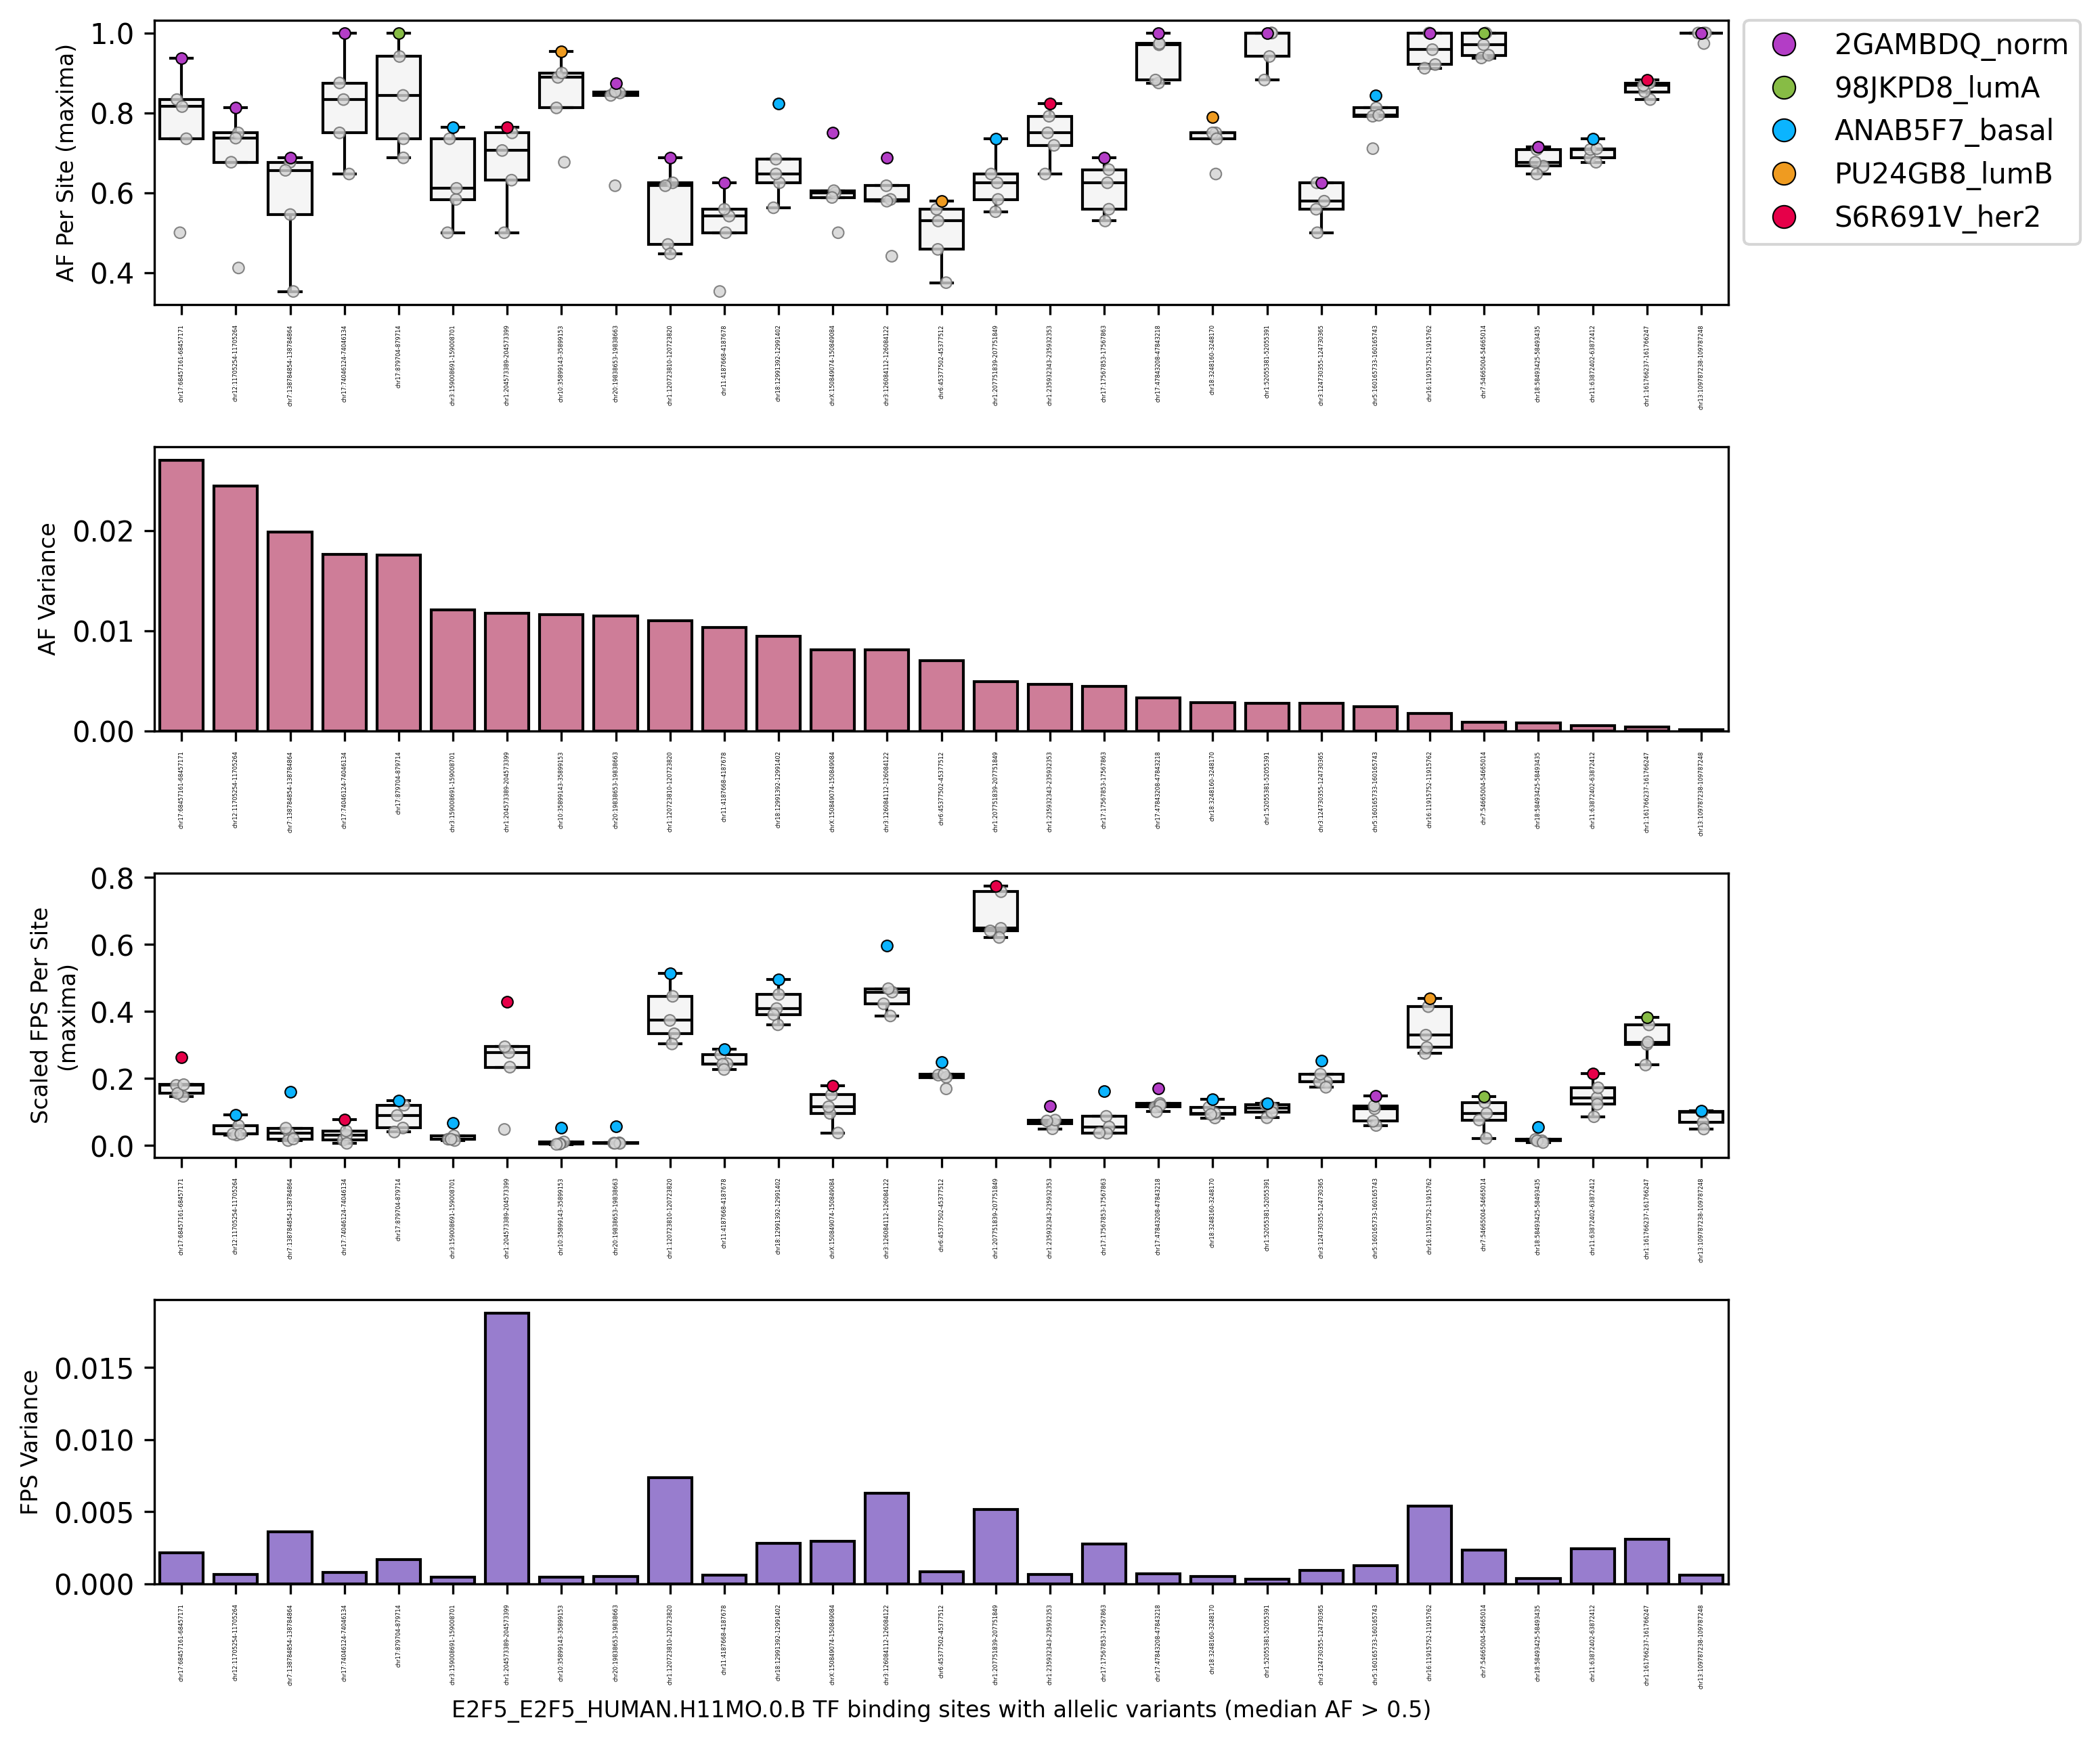

In [97]:
import textwrap
plt.figure(figsize=(10, 10), dpi=300)
# specify subplot
plt.subplot(4, 1, 1)
sns.boxplot(x='region_id', y='AF', data=high_nzaf_outlie_filtsort, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='AF', data=max_af_raw_inv, hue='sample_id', palette=color_gray_dict, size=4, jitter=True, legend=False, linewidth=0.5, edgecolor='dimgray', alpha=0.8)
sns.stripplot(x='region_id', y='AF', data=max_af_raw, hue='sample_id', palette=color_dict, size=4, jitter=True, linewidth=0.5, edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel('')
ylabel = textwrap.fill('AF Per Site (maxima)', width=20)
plt.ylabel(ylabel, fontsize=8)
# place legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=2, fontsize=10)
plt.subplot(4, 1, 2)
sns.barplot(x='region_id', y='AF_var', data=high_nzaf_outlie_filtsort, color='palevioletred', edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel('')
plt.ylabel('AF Variance', fontsize=8)
  
plt.subplot(4, 1, 3)
sns.boxplot(x='region_id', y='FPS_scaled', data=high_nzaf_outlie_filtsort, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='FPS_scaled', data=max_fps_scaled_inv, hue='sample_id', palette=color_gray_dict, size=4, jitter=True, legend=False, linewidth=0.5, edgecolor='dimgray', alpha=0.8)
sns.stripplot(x='region_id', y='FPS_scaled', data=max_fps_scaled, hue='sample_id', palette=color_dict, size=4, jitter=True, legend=False, linewidth=0.5, edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel('')
ylabel = textwrap.fill('Scaled FPS Per Site (maxima)', width=20)
plt.ylabel(ylabel, fontsize=8)

plt.subplot(4, 1, 4)
sns.barplot(x='region_id', y='FPS_scaled_var', data=high_nzaf_outlie_filtsort, color='mediumpurple', edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel(f'{motif_id} TF binding sites with allelic variants (median AF > 0.5)', fontsize=8)
plt.ylabel('FPS Variance', fontsize=8)
plt.subplots_adjust(hspace=0.5)

plt.show()

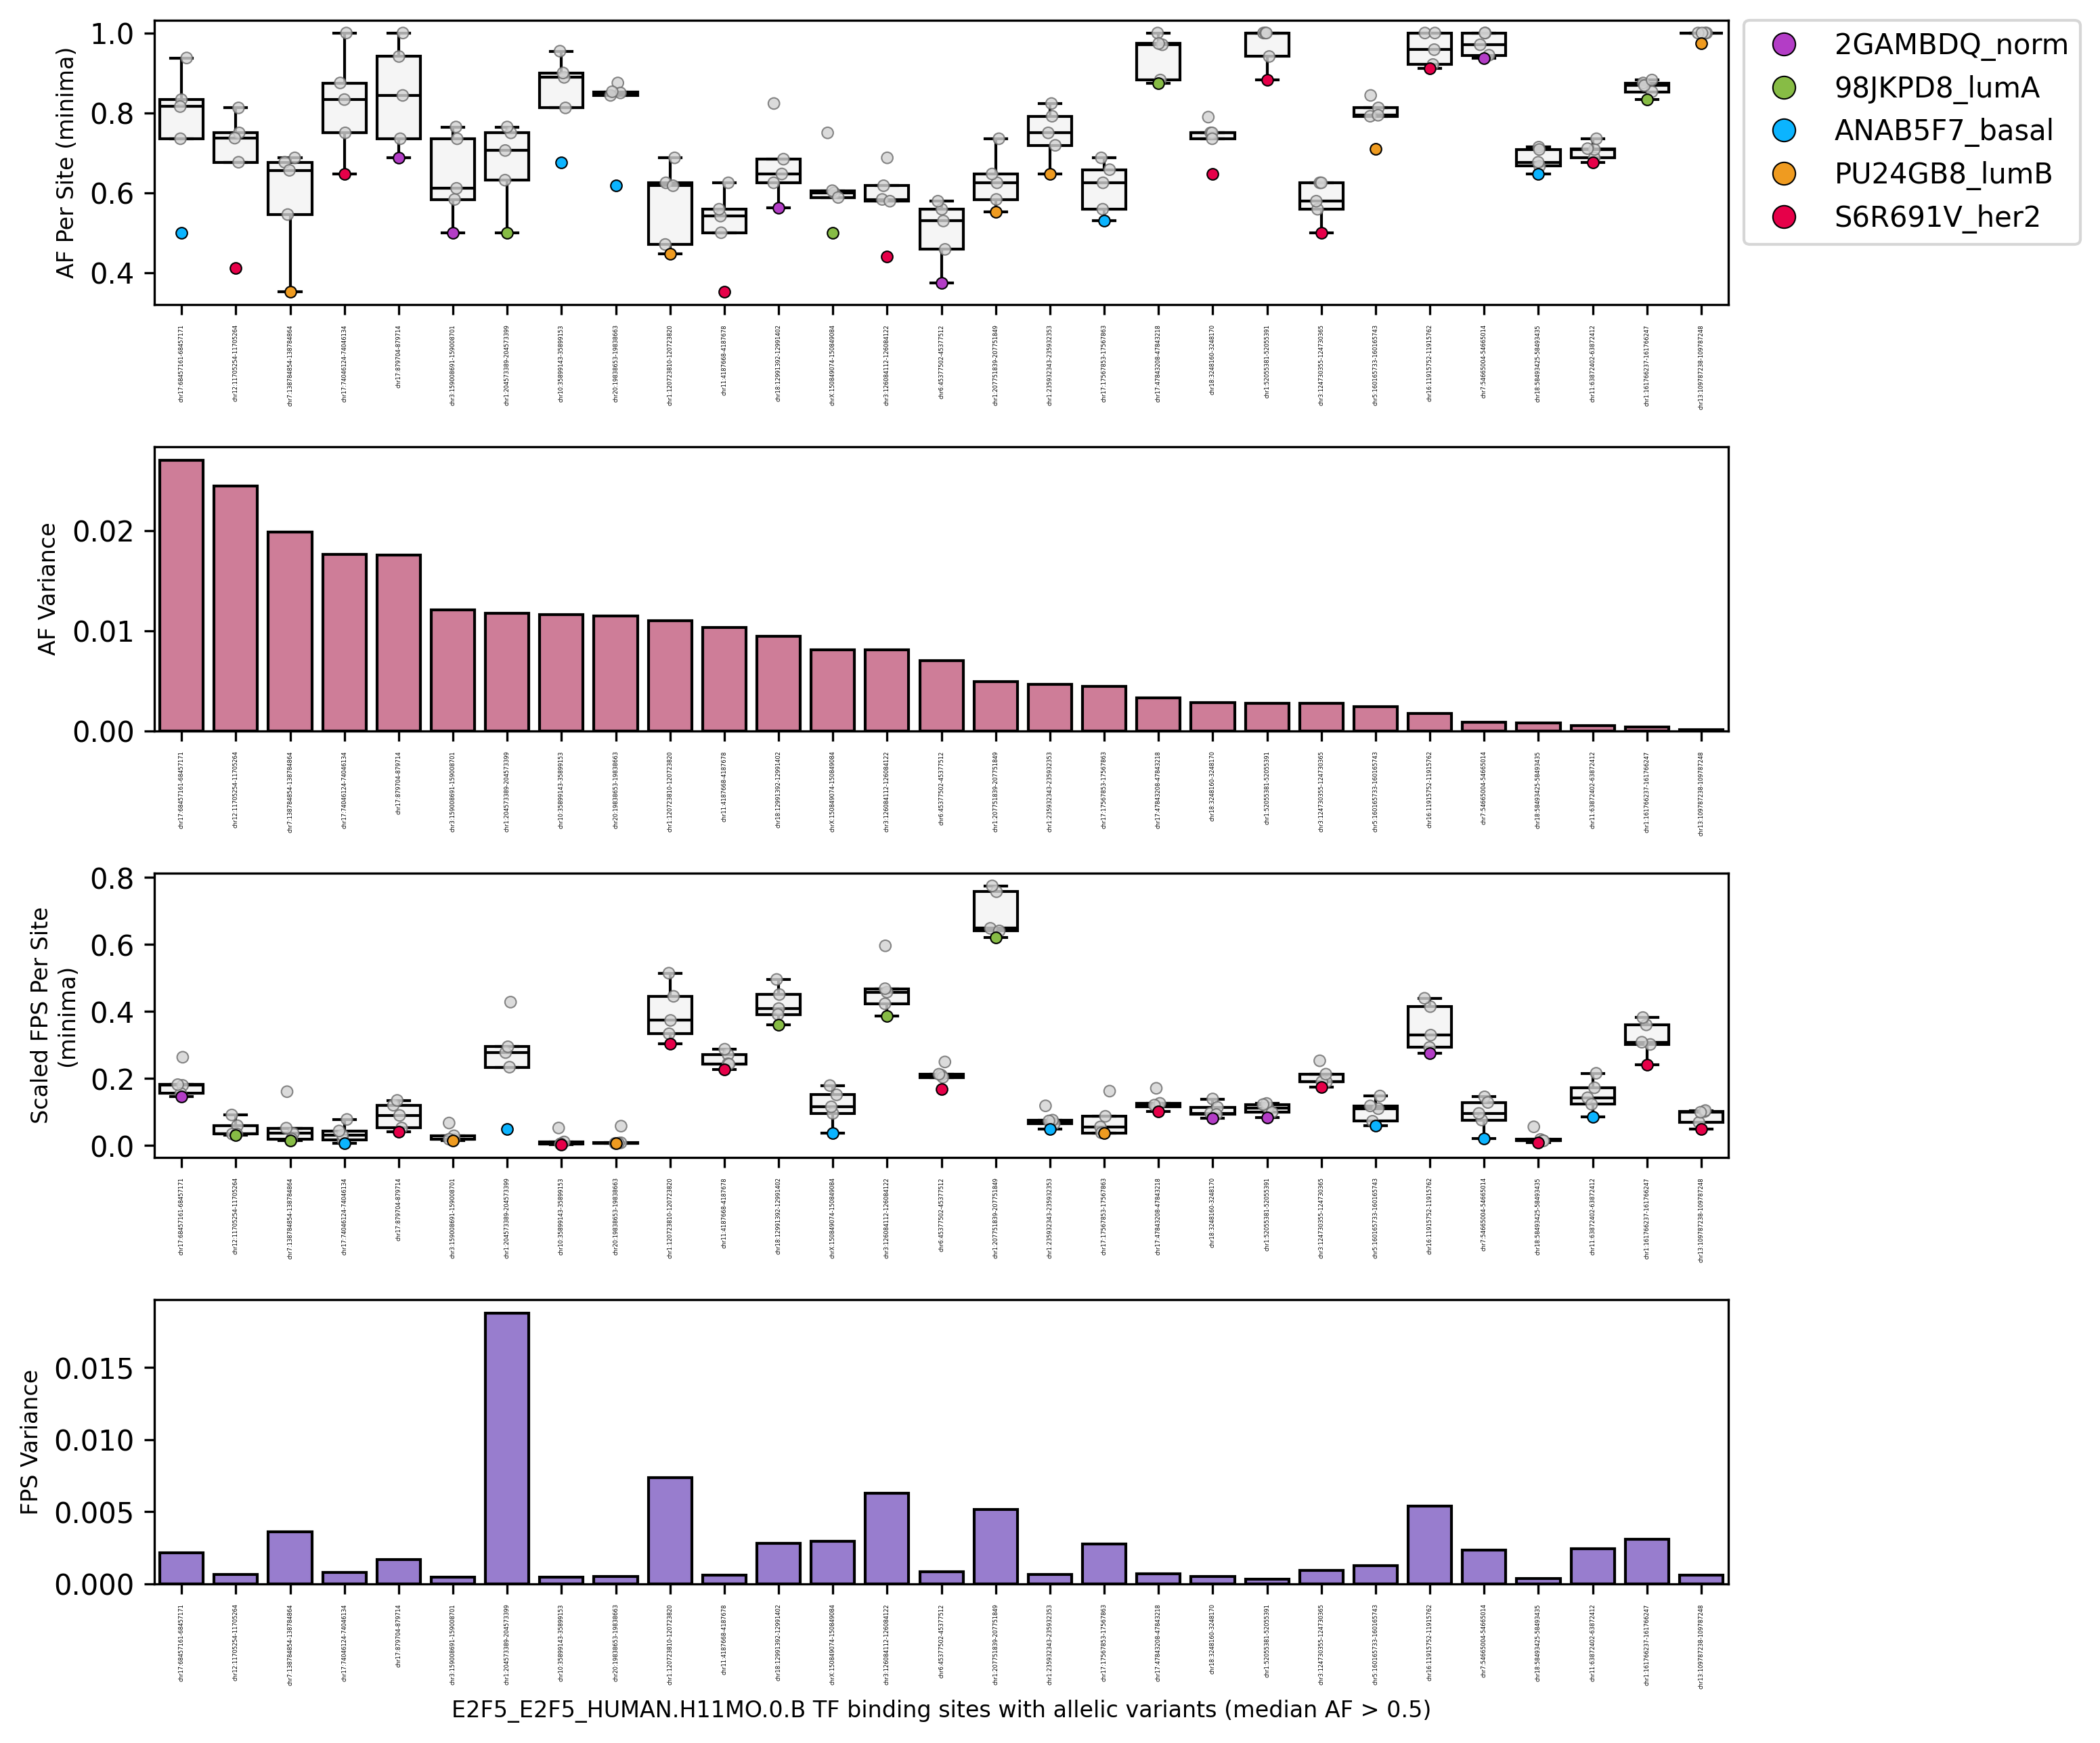

In [98]:
import textwrap
plt.figure(figsize=(10, 10), dpi=300)
# specify subplot
plt.subplot(4, 1, 1)
sns.boxplot(x='region_id', y='AF', data=high_nzaf_outlie_filtsort, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='AF', data=min_af_raw_inv, hue='sample_id', palette=color_gray_dict, size=4, jitter=True, legend=False, linewidth=0.5, edgecolor='dimgray', alpha=0.8)
sns.stripplot(x='region_id', y='AF', data=min_af_raw, hue='sample_id', palette=color_dict, size=4, jitter=True, linewidth=0.5, edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel('')
ylabel = textwrap.fill('AF Per Site (minima)', width=20)
plt.ylabel(ylabel, fontsize=8)
# place legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=2, fontsize=10)
plt.subplot(4, 1, 2)
sns.barplot(x='region_id', y='AF_var', data=high_nzaf_outlie_filtsort, color='palevioletred', edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel('')
plt.ylabel('AF Variance', fontsize=8)
  
plt.subplot(4, 1, 3)
sns.boxplot(x='region_id', y='FPS_scaled', data=high_nzaf_outlie_filtsort, color='whitesmoke', linecolor='black', showfliers=False)
sns.stripplot(x='region_id', y='FPS_scaled', data=min_fps_scaled_inv, hue='sample_id', palette=color_gray_dict, size=4, jitter=True, legend=False, linewidth=0.5, edgecolor='dimgray', alpha=0.8)
sns.stripplot(x='region_id', y='FPS_scaled', data=min_fps_scaled, hue='sample_id', palette=color_dict, size=4, jitter=True, legend=False, linewidth=0.5, edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel('')
ylabel = textwrap.fill('Scaled FPS Per Site (minima)', width=20)
plt.ylabel(ylabel, fontsize=8)

plt.subplot(4, 1, 4)
sns.barplot(x='region_id', y='FPS_scaled_var', data=high_nzaf_outlie_filtsort, color='mediumpurple', edgecolor='black')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel(f'{motif_id} TF binding sites with allelic variants (median AF > 0.5)', fontsize=8)
plt.ylabel('FPS Variance', fontsize=8)
plt.subplots_adjust(hspace=0.5)

plt.show()

In [100]:
# quantify the number of filtered sites per sample_id
max_af_raw_subset = max_af_raw[['region_id', 'sample_id']]
max_af_raw_df = max_af_raw_subset.groupby('sample_id', observed=True)['region_id'].count().to_frame()

In [101]:
max_fps_scaled_subset = max_fps_scaled[['region_id', 'sample_id']]
max_fps_scaled_df = max_fps_scaled_subset.groupby('sample_id', observed=True)['region_id'].count().to_frame()

In [102]:
max_fps_scaled_df

region_id
sample_id               
2GAMBDQ_norm           3
98JKPD8_lumA           2
ANAB5F7_basal         17
PU24GB8_lumB           1
S6R691V_her2           6

In [103]:
max_fps_scaled_subset

region_id      sample_id
4      chr17:68457161-68457171   S6R691V_her2
7      chr12:11705254-11705264  ANAB5F7_basal
12    chr7:138784854-138784864  ANAB5F7_basal
19     chr17:74046124-74046134   S6R691V_her2
22         chr17:879704-879714  ANAB5F7_basal
27    chr3:159008691-159008701  ANAB5F7_basal
34    chr1:204573389-204573399   S6R691V_her2
37     chr10:35899143-35899153  ANAB5F7_basal
42     chr20:19838653-19838663  ANAB5F7_basal
47    chr1:120723810-120723820  ANAB5F7_basal
52       chr11:4187668-4187678  ANAB5F7_basal
57     chr18:12991392-12991402  ANAB5F7_basal
64    chrX:150849074-150849084   S6R691V_her2
67    chr3:126084112-126084122  ANAB5F7_basal
72      chr6:45377502-45377512  ANAB5F7_basal
79    chr1:207751839-207751849   S6R691V_her2
80    chr1:235932343-235932353   2GAMBDQ_norm
87     chr17:17567853-17567863  ANAB5F7_basal
90     chr17:47843208-47843218   2GAMBDQ_norm
97       chr18:3248160-3248170  ANAB5F7_basal
102     chr1:52055381-52055391  ANAB5F7_basal
107   chr3:124730355-124730365  ANAB5F7_basal
110   chr5:160165733-160165743   2GAMBDQ_norm
118    chr16:11915752-11915762   PU24GB8_lumB
121     chr7:54665004-54665014   98JKPD8_lumA
127    chr18:58493425-58493435  ANAB5F7_basal
134    chr11:63872402-63872412   S6R691V_her2
136   chr1:161766237-161766247   98JKPD8_lumA
142  chr13:109787238-109787248  ANAB5F7_basal

In [104]:
high_nzaf_outlie_filtsort

region_id      sample_id        AF      FPS  FPS_scaled  \
0      chr17:68457161-68457171   2GAMBDQ_norm  0.937500  0.31338    0.146843   
1      chr17:68457161-68457171   98JKPD8_lumA  0.833333  0.40817    0.179750   
2      chr17:68457161-68457171  ANAB5F7_basal  0.500000  0.30407    0.155941   
3      chr17:68457161-68457171   PU24GB8_lumB  0.815789  0.38859    0.181973   
4      chr17:68457161-68457171   S6R691V_her2  0.735294  0.52970    0.263706   
..                         ...            ...       ...      ...         ...   
140  chr13:109787238-109787248   2GAMBDQ_norm  1.000000  0.21705    0.101705   
141  chr13:109787238-109787248   98JKPD8_lumA  1.000000  0.15718    0.069219   
142  chr13:109787238-109787248  ANAB5F7_basal  1.000000  0.20418    0.104713   
143  chr13:109787238-109787248   PU24GB8_lumB  0.973684  0.21274    0.099624   
144  chr13:109787238-109787248   S6R691V_her2  1.000000  0.09956    0.049565   

      FPS_var  FPS_scaled_var  AF_median    AF_var  
0    0.008274        0.002132   0.815789  0.027028  
1    0.008274        0.002132   0.815789  0.027028  
2    0.008274        0.002132   0.815789  0.027028  
3    0.008274        0.002132   0.815789  0.027028  
4    0.008274        0.002132   0.815789  0.027028  
..        ...             ...        ...       ...  
140  0.002501        0.000597   1.000000  0.000139  
141  0.002501        0.000597   1.000000  0.000139  
142  0.002501        0.000597   1.000000  0.000139  
143  0.002501        0.000597   1.000000  0.000139  
144  0.002501        0.000597   1.000000  0.000139  

[145 rows x 9 columns]